In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import requests
import zipfile
from io import BytesIO
from io import StringIO
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import time

from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import MinMaxScaler

2023-04-28 10:18:44.621790: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# import numpy as np
# import matplotlib.pyplot as plt

# def plot_training_time(datasets, model_name):
#     dataset_names = list(datasets.keys())
#     training_times = [datasets[dataset_name][model_name]['elapsed_time'] for dataset_name in dataset_names]

#     fig, ax = plt.subplots()
#     x = range(len(dataset_names))
#     ax.bar(dataset_names, training_times)

#     ax.set_xlabel('Datasets')
#     ax.set_ylabel('Training Time (s)')
#     ax.set_title(f'Training Time for {model_name}')
#     ax.set_xticks(x)
#     ax.set_xticklabels(dataset_names, rotation=45)

#     plt.show()

# def plot_mse(datasets, model_name):
#     dataset_names = list(datasets.keys())
#     mse_values = [datasets[dataset_name][model_name]['test_mse'] for dataset_name in dataset_names]

#     fig, ax = plt.subplots()
#     x = np.arange(len(dataset_names))
#     bar_width = 0.4

#     ax.bar(x, mse_values, width=bar_width)

#     ax.set_xlabel('Datasets')
#     ax.set_ylabel('MSE')
#     ax.set_title(f'MSE for {model_name}')
#     ax.set_xticks(x)
#     ax.set_xticklabels(dataset_names, rotation=45)

#     plt.show()

# def plot_accuracy(datasets, model_name):
#     dataset_names = list(datasets.keys())
#     accuracy_values = [datasets[dataset_name][model_name]['accuracy'] for dataset_name in dataset_names]

#     fig, ax = plt.subplots()
#     x = np.arange(len(dataset_names))
#     bar_width = 0.4

#     ax.bar(x, accuracy_values, width=bar_width)

#     ax.set_xlabel('Datasets')
#     ax.set_ylabel('Accuracy')
#     ax.set_title(f'Accuracy for {model_name}')
#     ax.set_xticks(x)
#     ax.set_xticklabels(dataset_names, rotation=45)

#     plt.show()

# def plot_mape(datasets, model_name):
#     dataset_names = list(datasets.keys())
#     mape_values = [datasets[dataset_name][model_name]['test_r2'] for dataset_name in dataset_names]

#     fig, ax = plt.subplots()
#     x = np.arange(len(dataset_names))
#     bar_width = 0.4

#     ax.bar(x, mape_values, width=bar_width)

#     ax.set_xlabel('Datasets')
#     ax.set_ylabel('R2')
#     ax.set_title(f'R2 for {model_name}')
#     ax.set_xticks(x)
#     ax.set_xticklabels(dataset_names, rotation=45)

#     plt.show()


# # def plot_all_models(datasets, title):
# #     model_names = list(datasets[list(datasets.keys())[0]].keys())

# #     for model_name in model_names:
# #         plot_training_time(datasets, model_name)
# #         plot_mse(datasets, model_name)

# def plot_all_models(datasets, title, task='regression'):
#     model_names = list(datasets[list(datasets.keys())[0]].keys())

#     for model_name in model_names:
#         plot_training_time(datasets, model_name)

#         if task == 'regression':
#             plot_mse(datasets, model_name)
#             plot_mape(datasets, model_name)
#         elif task == 'classification':
#             plot_accuracy(datasets, model_name)


In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_training_time(datasets):
    dataset_names = list(datasets.keys())
    model_names = list(datasets[dataset_names[0]].keys())

    training_times = []
    for dataset_name in dataset_names:
        training_times.append([datasets[dataset_name][model_name]['elapsed_time'] for model_name in model_names])

    df = pd.DataFrame(training_times, columns=model_names, index=dataset_names)
    sns.barplot(data=df, errorbar=None)
    plt.xlabel('Datasets')
    plt.ylabel('Training Time (s)')
    plt.title('Training Time for Models')
    plt.xticks(rotation=45)
    plt.show()

def plot_mse(datasets):
    dataset_names = list(datasets.keys())
    model_names = list(datasets[dataset_names[0]].keys())

    mse_values = []
    for dataset_name in dataset_names:
        mse_values.append([datasets[dataset_name][model_name]['test_mse'] for model_name in model_names])

    df = pd.DataFrame(mse_values, columns=model_names, index=dataset_names)
    sns.barplot(data=df, errorbar=None)
    plt.xlabel('Datasets')
    plt.ylabel('MSE')
    plt.title('MSE for Models')
    plt.xticks(rotation=45)
    plt.show()

def plot_accuracy(datasets):
    dataset_names = list(datasets.keys())
    model_names = list(datasets[dataset_names[0]].keys())

    accuracy_values = []
    for dataset_name in dataset_names:
        accuracy_values.append([datasets[dataset_name][model_name]['accuracy'] for model_name in model_names])

    df = pd.DataFrame(accuracy_values, columns=model_names, index=dataset_names)
    sns.barplot(data=df, errorbar=None)
    plt.xlabel('Datasets')
    plt.ylabel('Accuracy')
    plt.title('Accuracy for Models')
    plt.xticks(rotation=45)
    plt.show()

def plot_mape(datasets):
    dataset_names = list(datasets.keys())
    model_names = list(datasets[dataset_names[0]].keys())

    mape_values = []
    for dataset_name in dataset_names:
        mape_values.append([datasets[dataset_name][model_name]['test_r2'] for model_name in model_names])

    df = pd.DataFrame(mape_values, columns=model_names, index=dataset_names)
    sns.barplot(data=df, errorbar=None)
    plt.xlabel('Datasets')
    plt.ylabel('R2')
    plt.title('R2 for Models')
    plt.xticks(rotation=45)
    plt.show()

def plot_all_models(datasets, task='regression'):
    plot_training_time(datasets)

    if task == 'regression':
        plot_mse(datasets)
        plot_mape(datasets)
    elif task == 'classification':
        plot_accuracy(datasets)


In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

datasets = {
    'Parkinsons': (X_parkinsons_scaled, y_parkinsons),
    'Energy Efficiency': (X_energy_scaled, y_energy),
    'Superconductivity': (X_superconductivity_scaled, y_superconductivity),
    'Forest Fires': (X_forest_fires_scaled, y_forest_fires),
    'Wine Quality': (X_wine_quality_scaled, y_wine_quality)
}

def plot_training_time(datasets, dataset_name):
    dataset_names = list(datasets.keys())
    model_names = list(datasets[dataset_names[0]].keys())

    training_times = []
    for name in dataset_names:
        if name == dataset_name:
            training_times.append([datasets[name][model_name]['elapsed_time'] for model_name in model_names])

    df = pd.DataFrame(training_times, columns=model_names, index=[dataset_name])
    sns.barplot(data=df, errorbar=None)
    plt.xlabel('Datasets')
    plt.ylabel('Training Time (s)')
    plt.title('Training Time for Models')
    plt.xticks(rotation=45)
    plt.show()

def plot_mse(datasets, dataset_name):
    dataset_names = list(datasets.keys())
    model_names = list(datasets[dataset_names[0]].keys())

    mse_values = []
    for name in dataset_names:
        if name == dataset_name:
            mse_values.append([datasets[name][model_name]['test_mse'] for model_name in model_names])

    df = pd.DataFrame(mse_values, columns=model_names, index=[dataset_name])
    sns.barplot(data=df, errorbar=None)
    plt.xlabel('Datasets')
    plt.ylabel('MSE')
    plt.title('MSE for Models')
    plt.xticks(rotation=45)
    plt.show()

def plot_mape(datasets, dataset_name):
    dataset_names = list(datasets.keys())
    model_names = list(datasets[dataset_names[0]].keys())

    mape_values = []
    for name in dataset_names:
        if name == dataset_name:
            mape_values.append([datasets[name][model_name]['test_r2'] for model_name in model_names])

    df = pd.DataFrame(mape_values, columns=model_names, index=[dataset_name])
    sns.barplot(data=df, errorbar=None)
    plt.xlabel('Datasets')
    plt.ylabel('R2')
    plt.title('R2 for Models')
    plt.xticks(rotation=45)
    plt.show()

def plot_all_models(datasets, dataset_name, task='regression'):
    plot_training_time(datasets, dataset_name)

    if task == 'regression':
        plot_mse(datasets, dataset_name)
        plot_mape(datasets, dataset_name)
    elif task == 'classification':
        plot_accuracy(datasets, dataset_name)




In [8]:
# import numpy as np
# import matplotlib.pyplot as plt

# def plot_training_time(datasets):
#     dataset_names = list(datasets.keys())
#     model_names = list(datasets[dataset_names[0]].keys())

#     training_times = []
#     for dataset_name in dataset_names:
#         training_times.append([datasets[dataset_name][model_name]['elapsed_time'] for model_name in model_names])

#     plt.figure(figsize=(10,6))
#     for i, model_name in enumerate(model_names):
#         plt.bar(np.arange(len(dataset_names)) + i*0.1, training_times[i], width=0.1, label=model_name)

#     plt.xlabel('Datasets')
#     plt.ylabel('Training Time (s)')
#     plt.title('Training Time for Models')
#     plt.xticks(np.arange(len(dataset_names)), dataset_names, rotation=45)
#     plt.legend()
#     plt.show()

# def plot_mse(datasets):
#     dataset_names = list(datasets.keys())
#     model_names = list(datasets[dataset_names[0]].keys())

#     mse_values = []
#     for dataset_name in dataset_names:
#         mse_values.append([datasets[dataset_name][model_name]['test_mse'] for model_name in model_names])

#     plt.figure(figsize=(10,6))
#     for i, model_name in enumerate(model_names):
#         plt.bar(np.arange(len(dataset_names)) + i*0.1, mse_values[i], width=0.1, label=model_name)

#     plt.xlabel('Datasets')
#     plt.ylabel('MSE')
#     plt.title('MSE for Models')
#     plt.xticks(np.arange(len(dataset_names)), dataset_names, rotation=45)
#     plt.legend()
#     plt.show()

# def plot_accuracy(datasets):
#     dataset_names = list(datasets.keys())
#     model_names = list(datasets[dataset_names[0]].keys())

#     accuracy_values = []
#     for dataset_name in dataset_names:
#         accuracy_values.append([datasets[dataset_name][model_name]['accuracy'] for model_name in model_names])

#     plt.figure(figsize=(10,6))
#     for i, model_name in enumerate(model_names):
#         plt.bar(np.arange(len(dataset_names)) + i*0.1, accuracy_values[i], width=0.1, label=model_name)

#     plt.xlabel('Datasets')
#     plt.ylabel('Accuracy')
#     plt.title('Accuracy for Models')
#     plt.xticks(np.arange(len(dataset_names)), dataset_names, rotation=45)
#     plt.legend()
#     plt.show()

# def plot_mape(datasets):
#     dataset_names = list(datasets.keys())
#     model_names = list(datasets[dataset_names[0]].keys())

#     mape_values = []
#     for dataset_name in dataset_names:
#         mape_values.append([datasets[dataset_name][model_name]['test_r2'] for model_name in model_names])

#     plt.figure(figsize=(10,6))
#     for i, model_name in enumerate(model_names):
#         plt.bar(np.arange(len(dataset_names)) + i*0.1, mape_values[i], width=0.1, label=model_name)

#     plt.xlabel('Datasets')
#     plt.ylabel('R2')
#     plt.title('R2 for Models')
#     plt.xticks(np.arange(len(dataset_names)), dataset_names, rotation=45)
#     plt.legend()
#     plt.show()

# def plot_all_models(datasets, task='regression'):
#     plot_training_time(datasets)

#     if task == 'regression':
#         plot_mse(datasets)
#         plot_mape(datasets)
#     elif task == 'classification':
#         plot_accuracy(datasets)

In [9]:
# def run_regression(X, y, random_state=42, test_size=0.2):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

#     regression_models = [
#         ('Lasso', Lasso(alpha=0.1)),
#         ('RandomForest', RandomForestRegressor(n_estimators=100, random_state=random_state)),
#         ('XGBoost', XGBRegressor(n_estimators=100, random_state=random_state)),
#         ('SVR', SVR(kernel='linear')),
#         ('k-NN', KNeighborsRegressor(n_neighbors=5)),
#         ('AdaBoost', AdaBoostRegressor(n_estimators=100, random_state=random_state)),
#         ('ExtraTrees', ExtraTreesRegressor(n_estimators=100, random_state=random_state))
#     ]

#     results = {}
#     for name, model in regression_models:
#         start_time = time.time()
#         model.fit(X_train, y_train)
#         elapsed_time = time.time() - start_time
#         y_pred_test = model.predict(X_test)
#         test_error = mean_squared_error(y_test, y_pred_test)
#         test_r2 = r2_score(y_test, y_pred_test)

#         results[name] = {
#             'test_mse': test_error,
#             'test_r2': test_r2,
#             'elapsed_time': elapsed_time
#         }

#     return results

In [10]:
from sklearn.metrics import mean_absolute_error

# def mean_absolute_percentage_error(y_true, y_pred):
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# def mean_absolute_percentage_error(y_true, y_pred):
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     error = 0
#     for i in range(len(y_true)):
#         error += (np.abs(y_true[i] - y_pred[i]) / y_true[i])
#     return error / len(y_true) * 100


def run_regression(X, y, random_state=42, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    regression_models = [
        ('Lasso', Lasso(alpha=0.1)),
        ('RandomForest', RandomForestRegressor(n_estimators=100, random_state=random_state)),
        ('XGBoost', XGBRegressor(n_estimators=100, random_state=random_state)),
        ('SVR', SVR(kernel='linear')),
        ('k-NN', KNeighborsRegressor(n_neighbors=5)),
        ('AdaBoost', AdaBoostRegressor(n_estimators=100, random_state=random_state)),
        ('ExtraTrees', ExtraTreesRegressor(n_estimators=100, random_state=random_state))
    ]

    results = {}
    for name, model in regression_models:
        start_time = time.time()
        model.fit(X_train, y_train)
        elapsed_time = time.time() - start_time
        y_pred_test = model.predict(X_test)
        test_error = mean_squared_error(y_test, y_pred_test)
        test_r2 = r2_score(y_test, y_pred_test)
        #test_mape = mean_absolute_percentage_error(y_test, y_pred_test)

        results[name] = {
            'test_mse': test_error,
            'test_r2': test_r2,
            #'test_mape': test_mape,
            'elapsed_time': elapsed_time
        }

    return results


In [11]:


# Load and preprocess the datasets
def load_and_preprocess_parkinsons():
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data'
    df = pd.read_csv(url)
    df = df.drop(['subject#'], axis=1)
    X = df.drop(['motor_UPDRS', 'total_UPDRS'], axis=1).values
    y = df['total_UPDRS'].values
    return X, y

def load_and_preprocess_energy():
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'
    df = pd.read_excel(url)
    X = df.drop(['Y1', 'Y2'], axis=1).values
    y = df['Y1'].values
    return X, y

# def load_and_preprocess_superconductivity():
#     url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00464/superconduct.zip'
#     df = pd.read_csv(url, compression='zip')
#     X = df.drop(['critical_temp'], axis=1).values
#     y = df['critical_temp'].values
#     return X, y

def load_and_preprocess_superconductivity():
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00464/superconduct.zip'
    response = requests.get(url)
    zf = zipfile.ZipFile(BytesIO(response.content))
    df = pd.read_csv(zf.open('train.csv'))
    X = df.drop(['critical_temp'], axis=1).values
    y = df['critical_temp'].values
    return X, y

def load_and_preprocess_forest_fires():
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'
    df = pd.read_csv(url)
    df = pd.get_dummies(df)
    X = df.drop(['area'], axis=1).values
    y = df['area'].values
    return X, y

def load_and_preprocess_wine_quality():
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
    df = pd.read_csv(url, delimiter=';')
    X = df.drop(['quality'], axis=1).values
    y = df['quality'].values
    return X, y

X_parkinsons, y_parkinsons = load_and_preprocess_parkinsons()
X_energy, y_energy = load_and_preprocess_energy()
X_superconductivity, y_superconductivity = load_and_preprocess_superconductivity()
X_forest_fires, y_forest_fires = load_and_preprocess_forest_fires()
X_wine_quality, y_wine_quality = load_and_preprocess_wine_quality()

# Scale the datasets
scaler_parkinsons = StandardScaler().fit(X_parkinsons)
scaler_energy = StandardScaler().fit(X_energy)
scaler_superconductivity = StandardScaler().fit(X_superconductivity)
scaler_forest_fires = StandardScaler().fit(X_forest_fires)
scaler_wine_quality = StandardScaler().fit(X_wine_quality)

X_parkinsons_scaled = scaler_parkinsons.transform(X_parkinsons)
X_energy_scaled = scaler_energy.transform(X_energy)
X_superconductivity_scaled = scaler_superconductivity.transform(X_superconductivity)
X_forest_fires_scaled = scaler_forest_fires.transform(X_forest_fires)
X_wine_quality_scaled = scaler_wine_quality.transform(X_wine_quality)

In [12]:
datasets = {
    'Parkinsons': (X_parkinsons_scaled, y_parkinsons),
    'Energy Efficiency': (X_energy_scaled, y_energy),
    'Superconductivity': (X_superconductivity_scaled, y_superconductivity),
    'Forest Fires': (X_forest_fires_scaled, y_forest_fires),
    'Wine Quality': (X_wine_quality_scaled, y_wine_quality)
}

In [13]:
all_results = {}

for dataset_name, (X, y) in datasets.items():
    print(f"\n{dataset_name}:")
    results = run_regression(X, y)
    all_results[dataset_name] = results
    for model_name, metrics in results.items():
        print(f"{model_name}: Test MSE: {metrics['test_mse']:.4f}, Test R2: {metrics['test_r2']:.4f}")


Parkinsons:
Lasso: Test MSE: 93.4615, Test R2: 0.1566
RandomForest: Test MSE: 2.5748, Test R2: 0.9768
XGBoost: Test MSE: 4.8244, Test R2: 0.9565
SVR: Test MSE: 96.6305, Test R2: 0.1280
k-NN: Test MSE: 39.4418, Test R2: 0.6441
AdaBoost: Test MSE: 69.1746, Test R2: 0.3758
ExtraTrees: Test MSE: 2.2313, Test R2: 0.9799

Energy Efficiency:
Lasso: Test MSE: 9.9394, Test R2: 0.9046
RandomForest: Test MSE: 0.2444, Test R2: 0.9977
XGBoost: Test MSE: 0.1442, Test R2: 0.9986
SVR: Test MSE: 9.7768, Test R2: 0.9062
k-NN: Test MSE: 5.3575, Test R2: 0.9486
AdaBoost: Test MSE: 4.0551, Test R2: 0.9611
ExtraTrees: Test MSE: 0.2564, Test R2: 0.9975

Superconductivity:
Lasso: Test MSE: 328.8063, Test R2: 0.7143
RandomForest: Test MSE: 81.4574, Test R2: 0.9292
XGBoost: Test MSE: 89.1691, Test R2: 0.9225
SVR: Test MSE: 321.2115, Test R2: 0.7209
k-NN: Test MSE: 108.9181, Test R2: 0.9054
AdaBoost: Test MSE: 408.6658, Test R2: 0.6450
ExtraTrees: Test MSE: 78.7690, Test R2: 0.9316

Forest Fires:
Lasso: Test MS

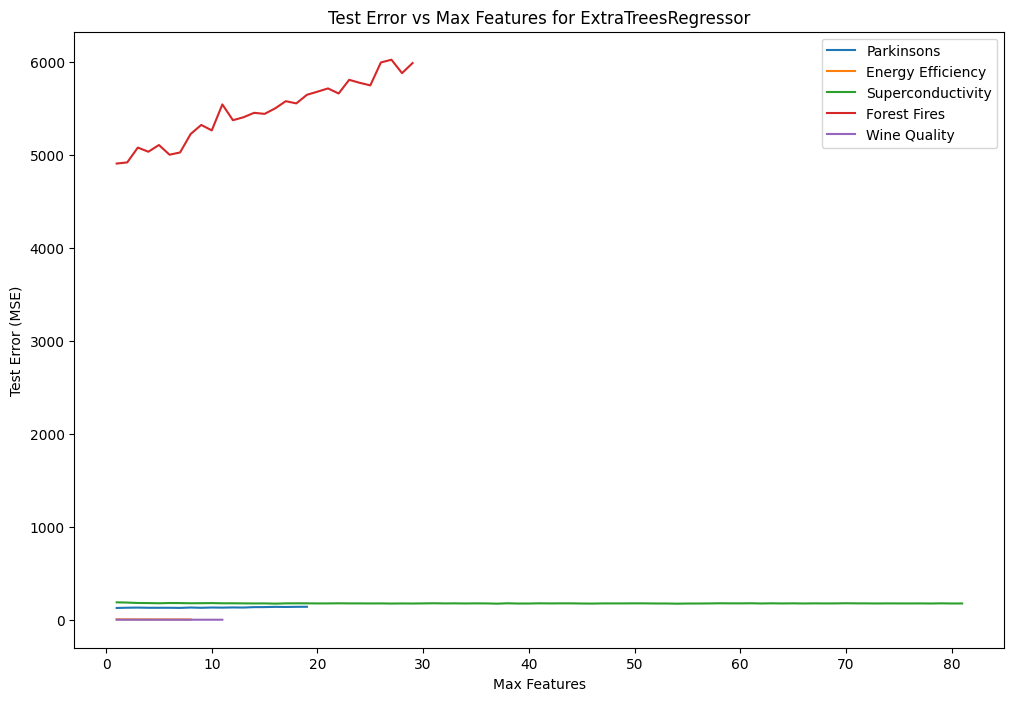

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Your dataset loading and scaling code goes here...

def test_error_vs_max_features(X, y):
    max_features_range = np.arange(1, X.shape[1] + 1)
    errors = []
    
    for max_features in max_features_range:
        reg = ExtraTreesRegressor(max_features=max_features, random_state=42, n_jobs=-1)
        scores = cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error')
        errors.append(-np.mean(scores))
    
    return max_features_range, errors

# Create a figure
plt.figure(figsize=(12, 8))

# Plot test error vs max_features for each dataset
for i, (dataset_name, (X, y)) in enumerate(datasets.items()):
    max_features_range, errors = test_error_vs_max_features(X, y)
    plt.plot(max_features_range, errors, label=dataset_name)

plt.xlabel('Max Features')
plt.ylabel('Test Error (MSE)')
plt.legend()
plt.title('Test Error vs Max Features for ExtraTreesRegressor')
plt.show()


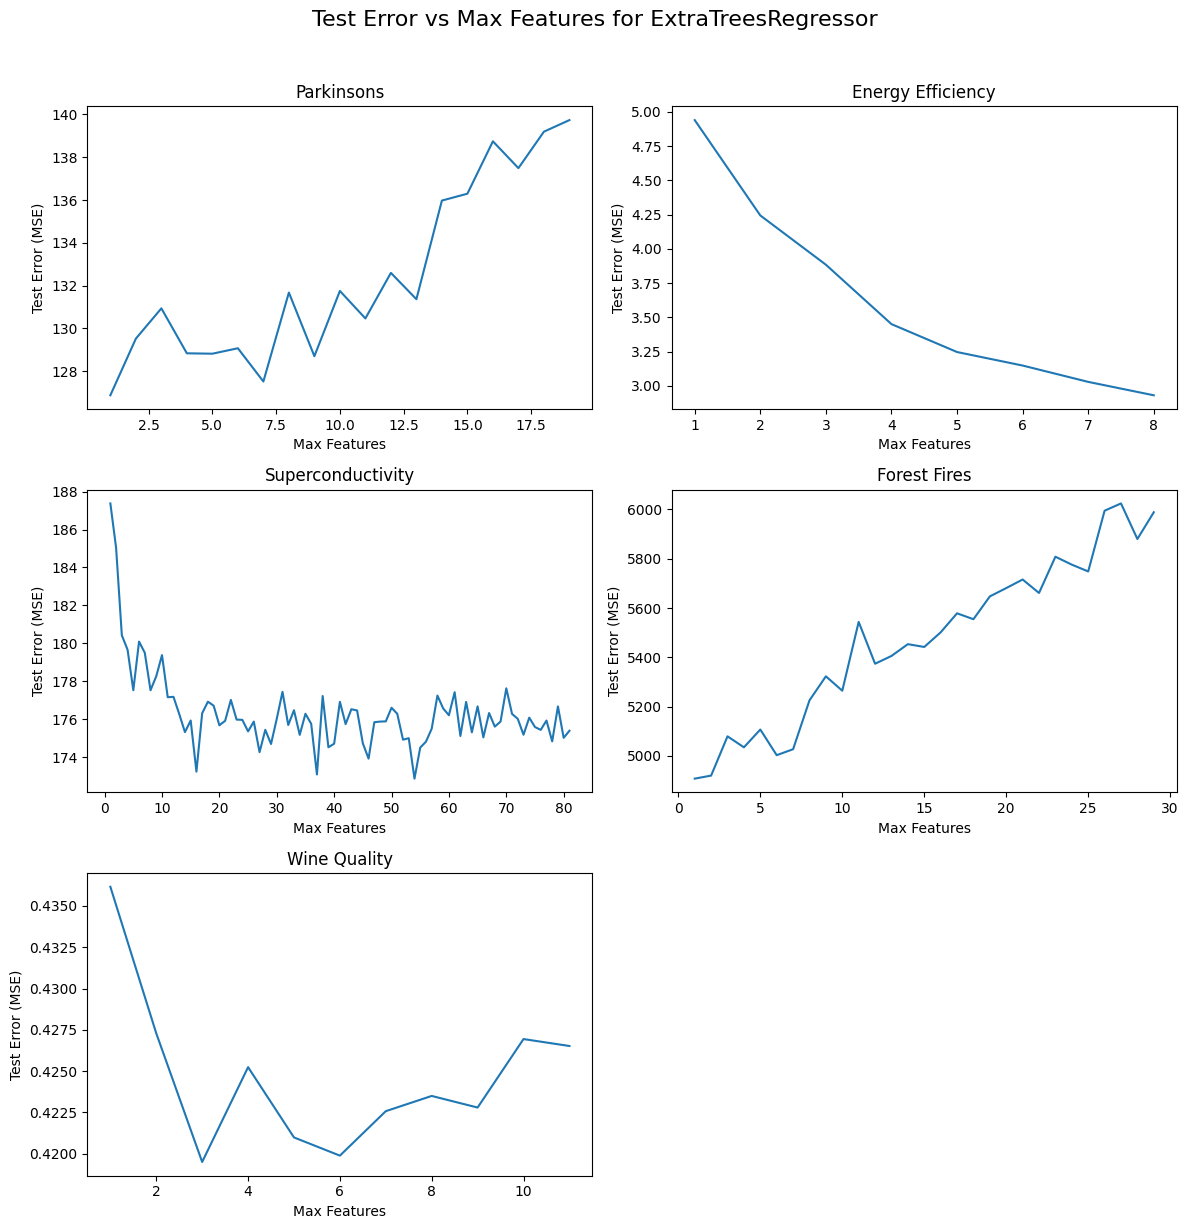

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score

# Your dataset loading and scaling code goes here...

def test_error_vs_max_features(X, y):
    max_features_range = np.arange(1, X.shape[1] + 1)
    errors = []
    
    for max_features in max_features_range:
        reg = ExtraTreesRegressor(max_features=max_features, random_state=42, n_jobs=-1)
        scores = cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error')
        errors.append(-np.mean(scores))
    
    return max_features_range, errors

# Create a figure
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.ravel()

# Plot test error vs max_features for each dataset
for i, (dataset_name, (X, y)) in enumerate(datasets.items()):
    max_features_range, errors = test_error_vs_max_features(X, y)
    axes[i].plot(max_features_range, errors)
    axes[i].set_xlabel('Max Features')
    axes[i].set_ylabel('Test Error (MSE)')
    axes[i].set_title(dataset_name)

# Remove the extra subplot
axes[-1].axis('off')

fig.suptitle('Test Error vs Max Features for ExtraTreesRegressor', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


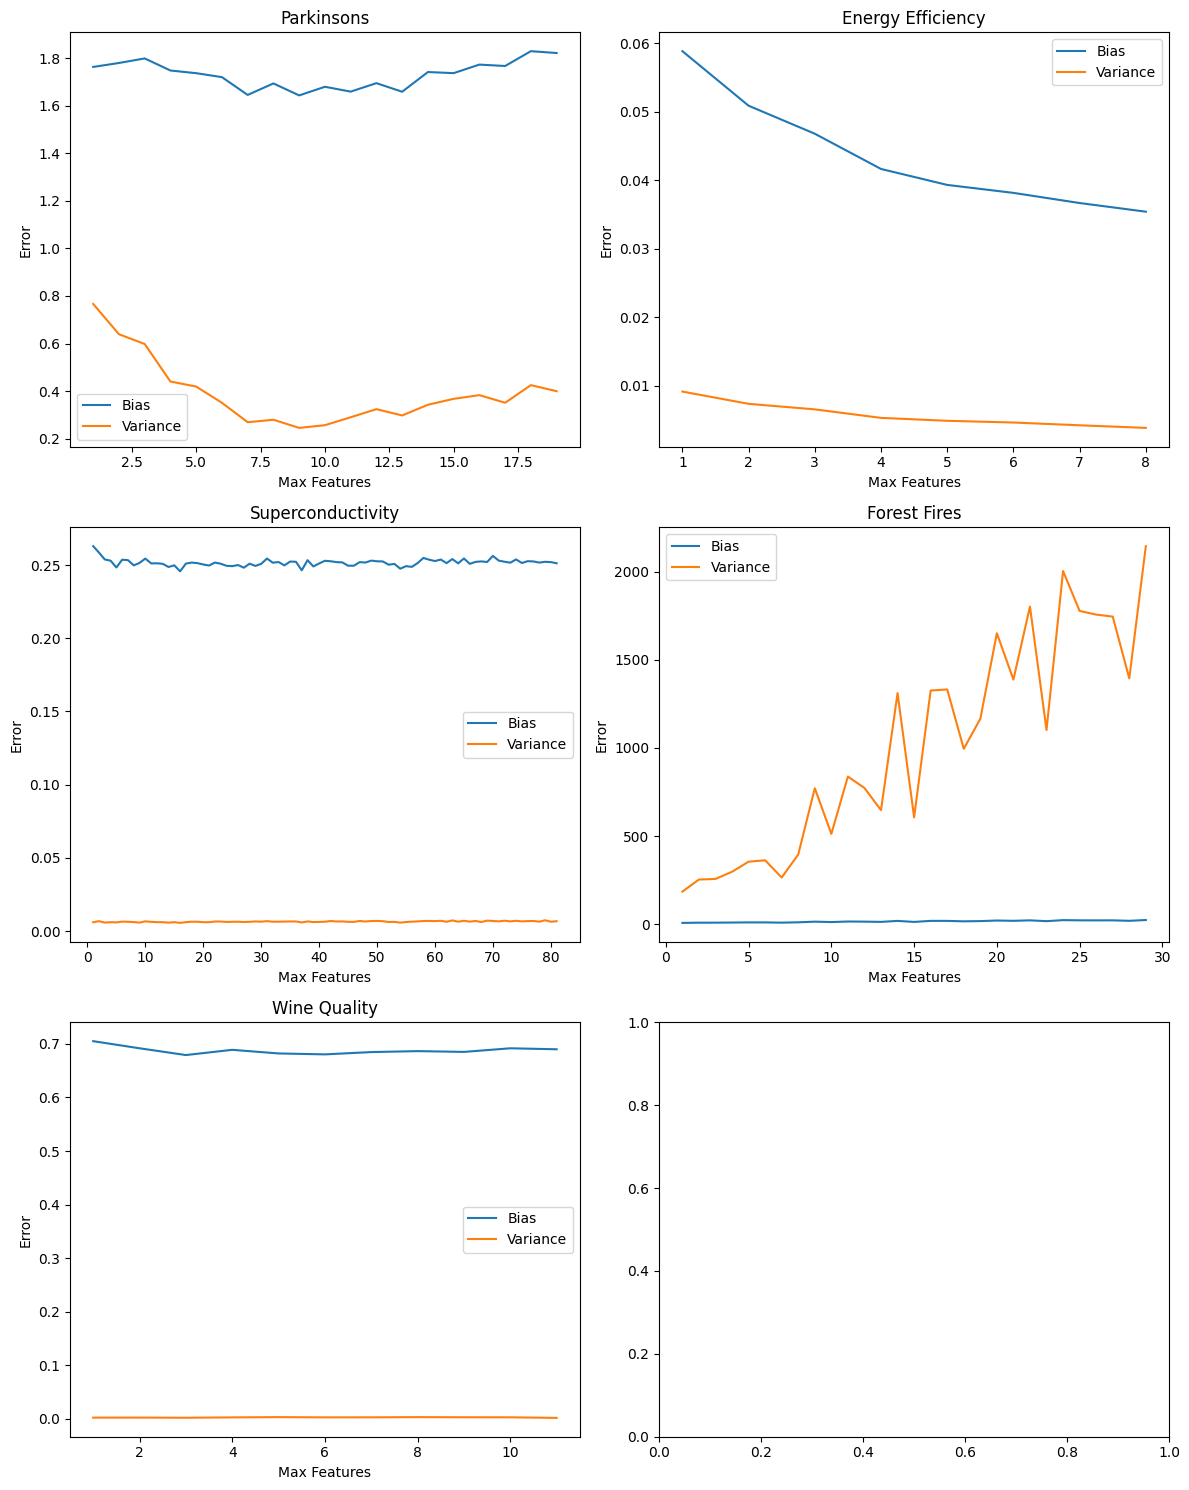

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score

# Function to calculate bias and variance
def bias_variance_tradeoff(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    bias = 1 - np.mean(scores)
    variance = np.var(scores)
    return bias, variance

datasets = {
    'Parkinsons': (X_parkinsons_scaled, y_parkinsons),
    'Energy Efficiency': (X_energy_scaled, y_energy),
    'Superconductivity': (X_superconductivity_scaled, y_superconductivity),
    'Forest Fires': (X_forest_fires_scaled, y_forest_fires),
    'Wine Quality': (X_wine_quality_scaled, y_wine_quality)
}

fig, ax = plt.subplots(3, 2, figsize=(12, 15))
ax = ax.ravel()

# Loop through datasets and plot the results
for i, (name, data) in enumerate(datasets.items()):
    X, y = data
    biases = []
    variances = []
    max_features_range = range(1, X.shape[1] + 1)

    for max_features in max_features_range:
        model = ExtraTreesRegressor(n_estimators=100, max_features=max_features, random_state=42)
        bias, variance = bias_variance_tradeoff(model, X, y)
        biases.append(bias)
        variances.append(variance)

    ax[i].plot(max_features_range, biases, label='Bias')
    ax[i].plot(max_features_range, variances, label='Variance')
    ax[i].set_title(name)
    ax[i].set_xlabel('Max Features')
    ax[i].set_ylabel('Error')
    ax[i].legend()

plt.tight_layout()
plt.show()

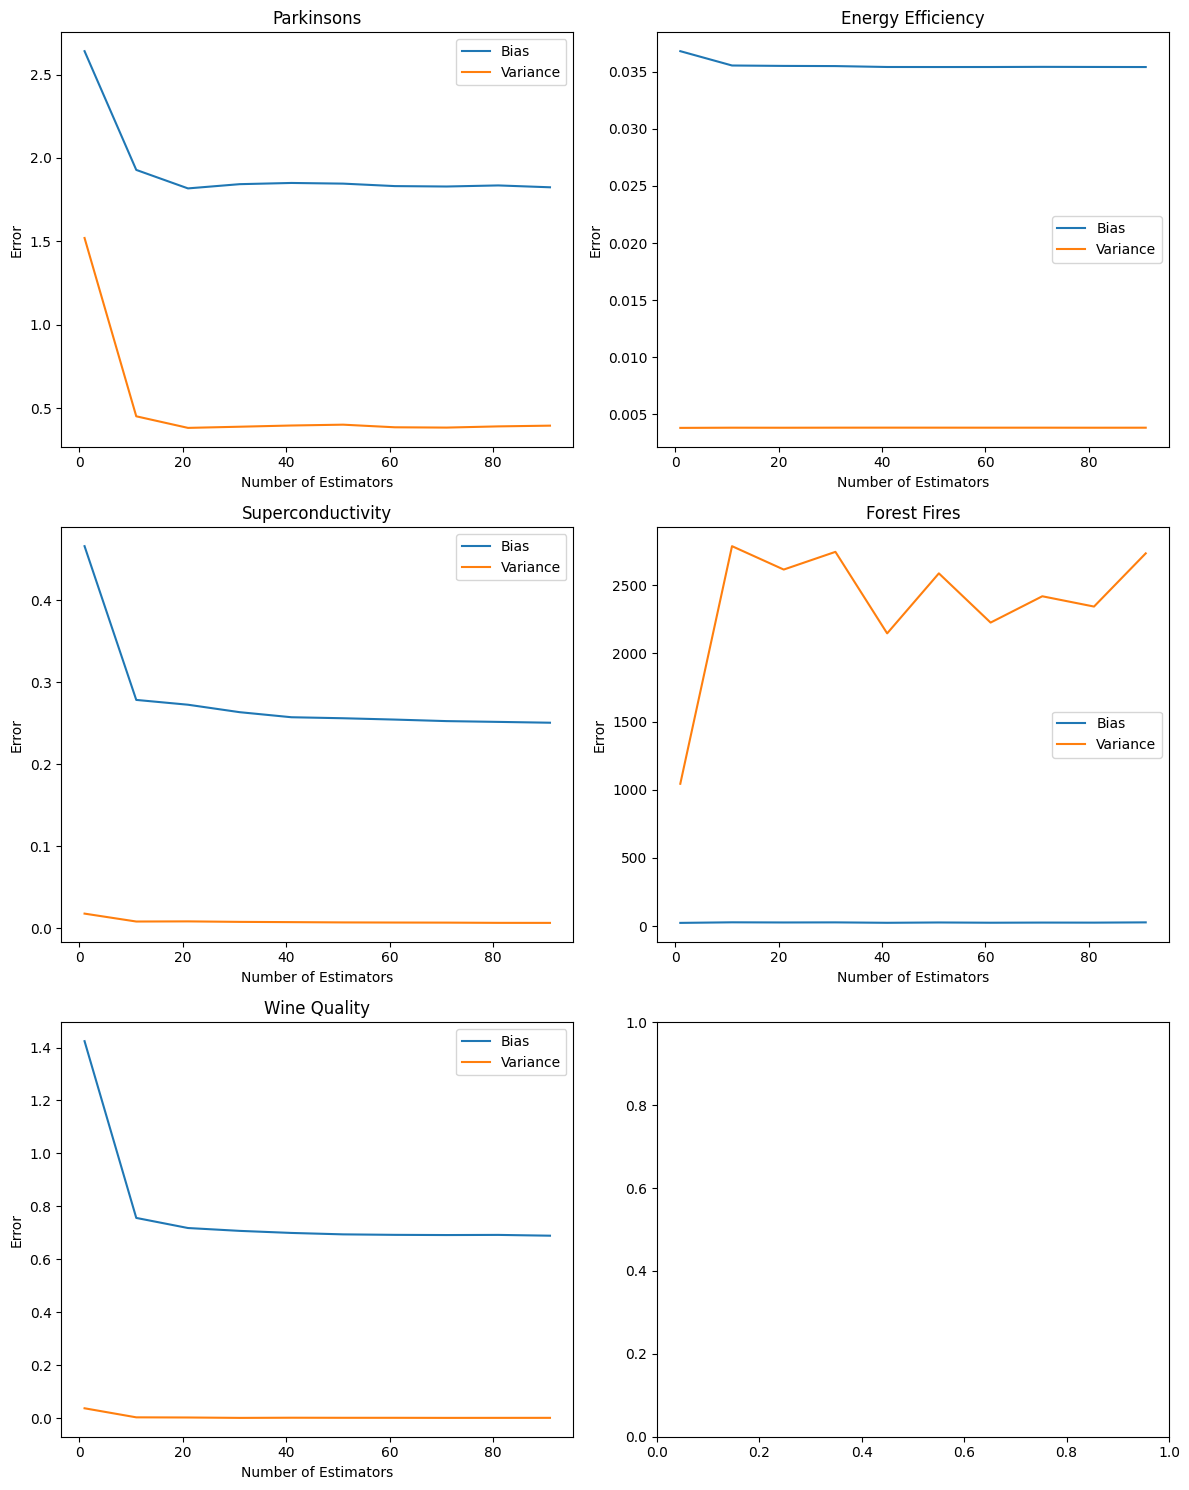

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score

# Function to calculate bias and variance
def bias_variance_tradeoff(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    bias = 1 - np.mean(scores)
    variance = np.var(scores)
    return bias, variance

datasets = {
    'Parkinsons': (X_parkinsons_scaled, y_parkinsons),
    'Energy Efficiency': (X_energy_scaled, y_energy),
    'Superconductivity': (X_superconductivity_scaled, y_superconductivity),
    'Forest Fires': (X_forest_fires_scaled, y_forest_fires),
    'Wine Quality': (X_wine_quality_scaled, y_wine_quality)
}

fig, ax = plt.subplots(3, 2, figsize=(12, 15))
ax = ax.ravel()

# Loop through datasets and plot the results
for i, (name, data) in enumerate(datasets.items()):
    X, y = data
    biases = []
    variances = []
    n_estimators_range = range(1, 101, 10)

    for n_estimators in n_estimators_range:
        model = ExtraTreesRegressor(n_estimators=n_estimators, random_state=42)
        bias, variance = bias_variance_tradeoff(model, X, y)
        biases.append(bias)
        variances.append(variance)

    ax[i].plot(n_estimators_range, biases, label='Bias')
    ax[i].plot(n_estimators_range, variances, label='Variance')
    ax[i].set_title(name)
    ax[i].set_xlabel('Number of Estimators')
    ax[i].set_ylabel('Error')
    ax[i].legend()

plt.tight_layout()
plt.show()

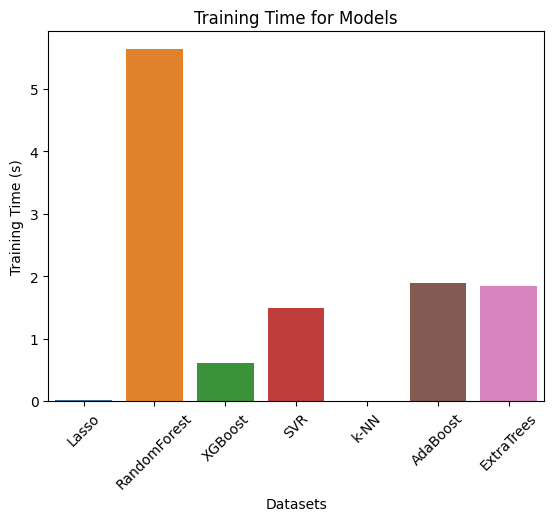

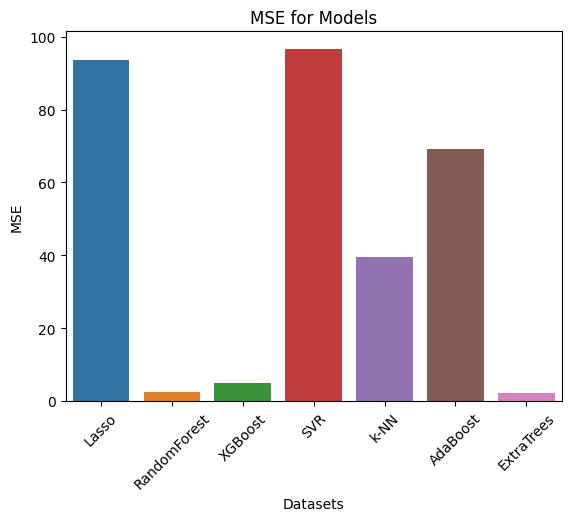

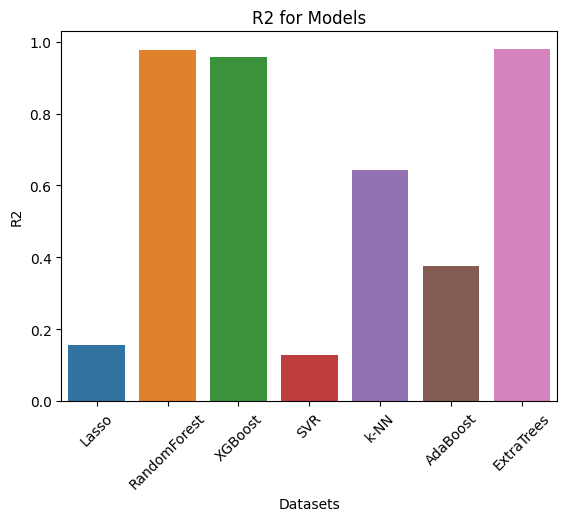

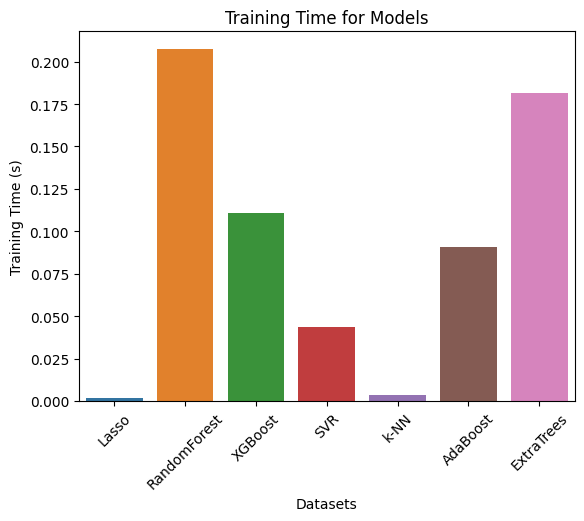

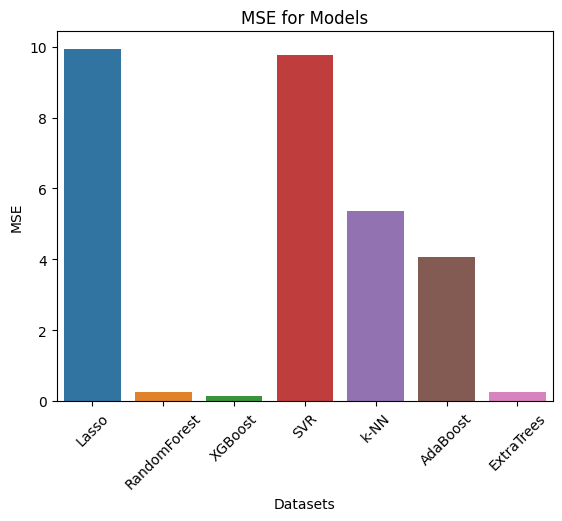

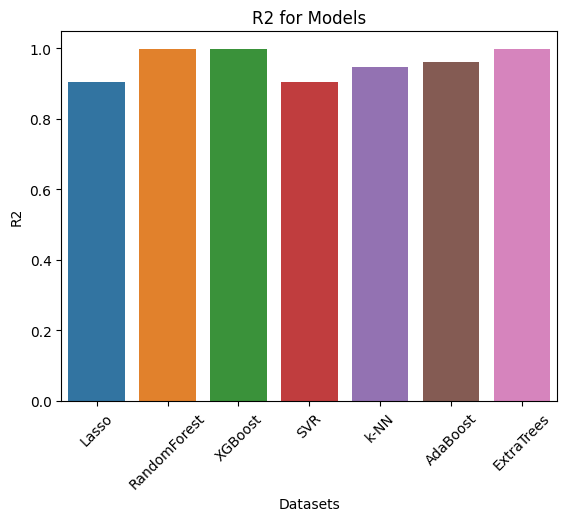

In [24]:
#plot_all_models(all_results, 'Results for all models', task='regression')
#plot_all_models(all_results, task='regression')

# datasets = {
#     'Parkinsons': (X_parkinsons_scaled, y_parkinsons),
#     'Energy Efficiency': (X_energy_scaled, y_energy),
#     'Superconductivity': (X_superconductivity_scaled, y_superconductivity),
#     'Forest Fires': (X_forest_fires_scaled, y_forest_fires),
#     'Wine Quality': (X_wine_quality_scaled, y_wine_quality)
# }


plot_all_models(all_results, 'Parkinsons', task='regression')
plot_all_models(all_results, 'Energy Efficiency', task='regression')
plot_all_models(all_results, 'Superconductivity', task='regression')
plot_all_models(all_results, 'Forest Fires', task='regression')
plot_all_models(all_results, 'Wine Quality', task='regression')

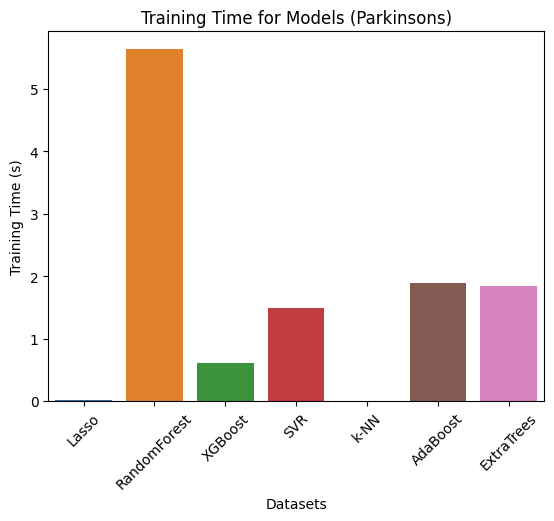

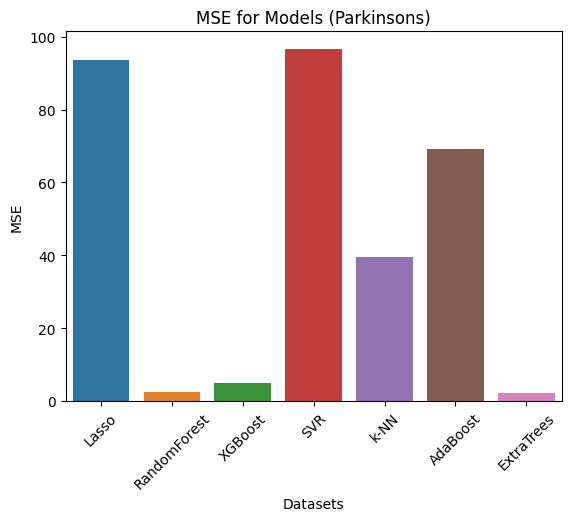

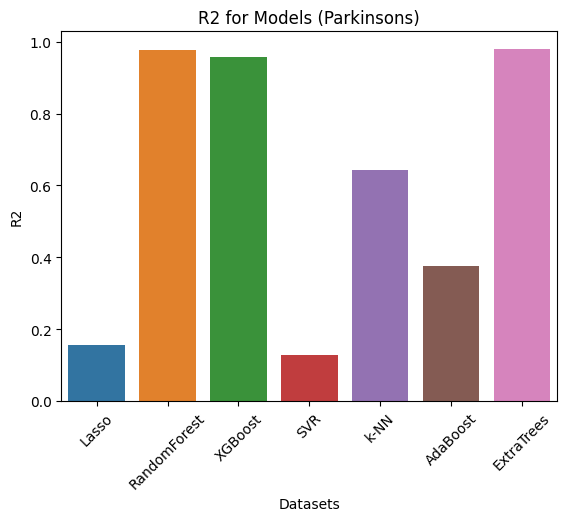

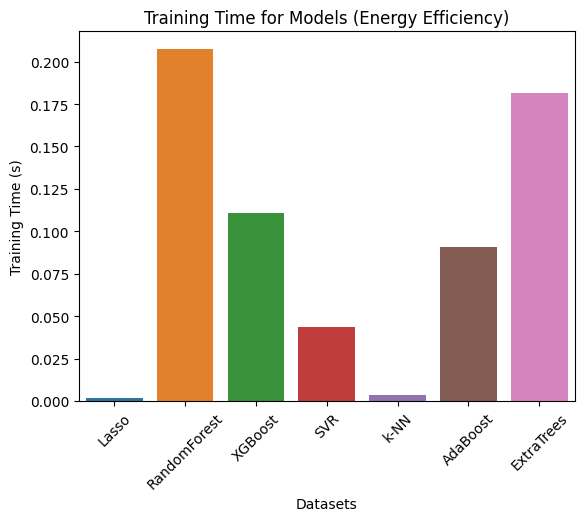

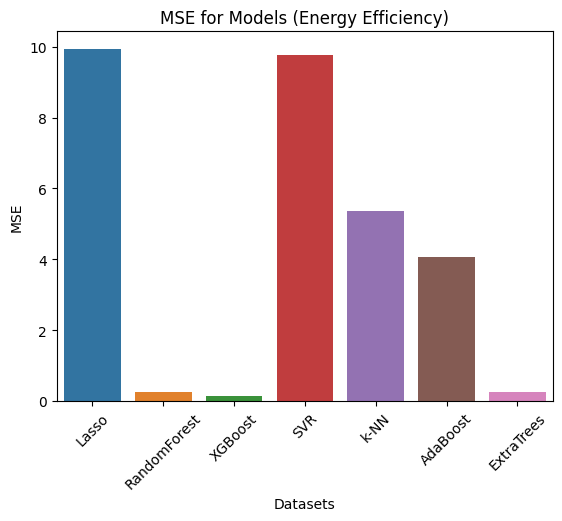

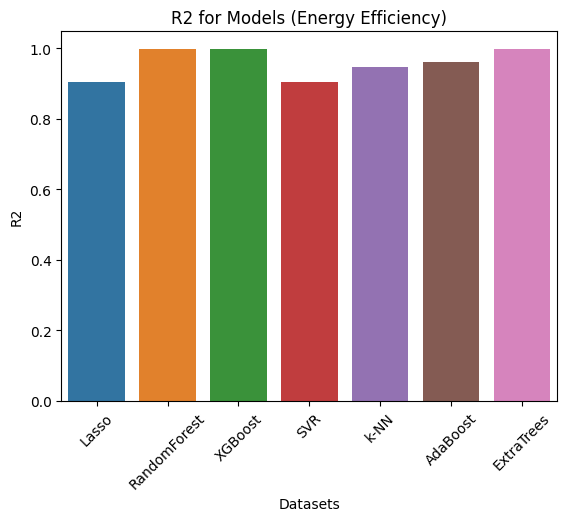

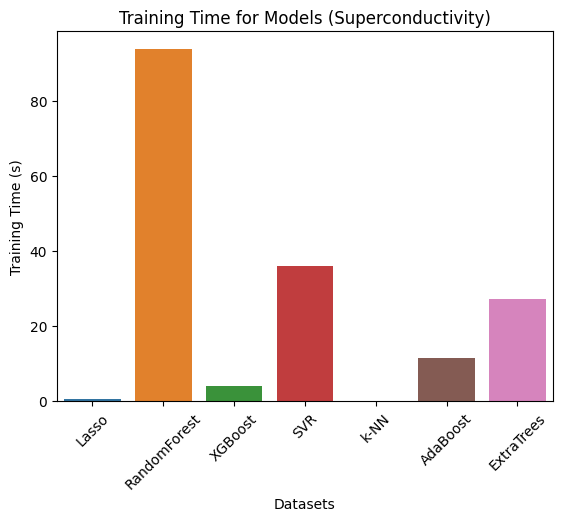

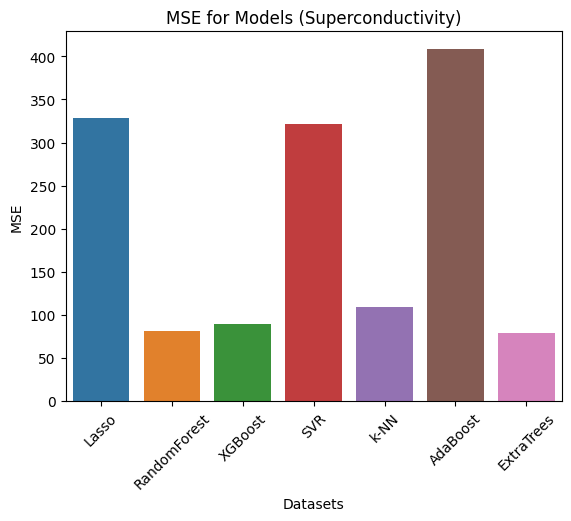

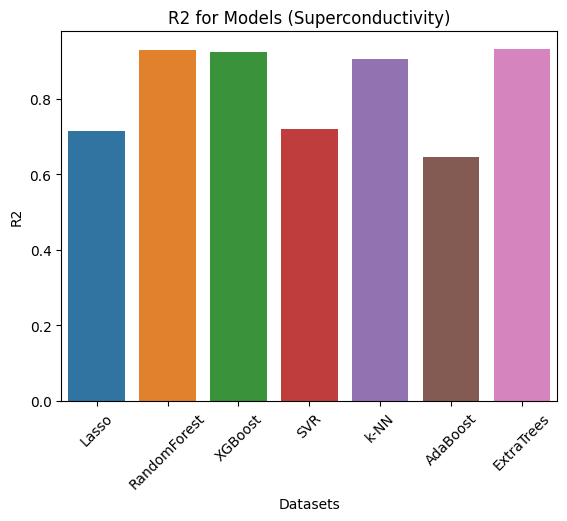

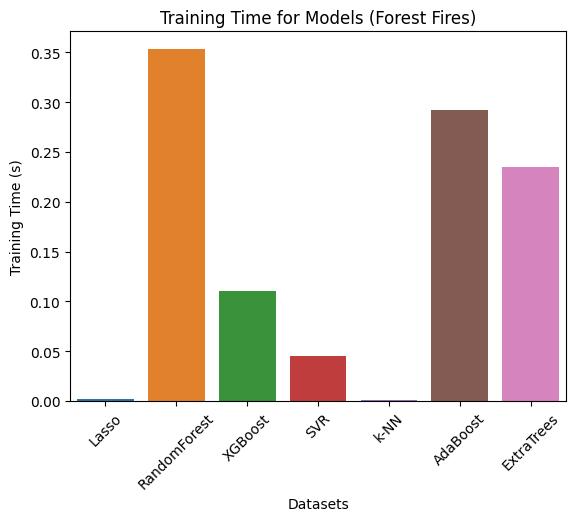

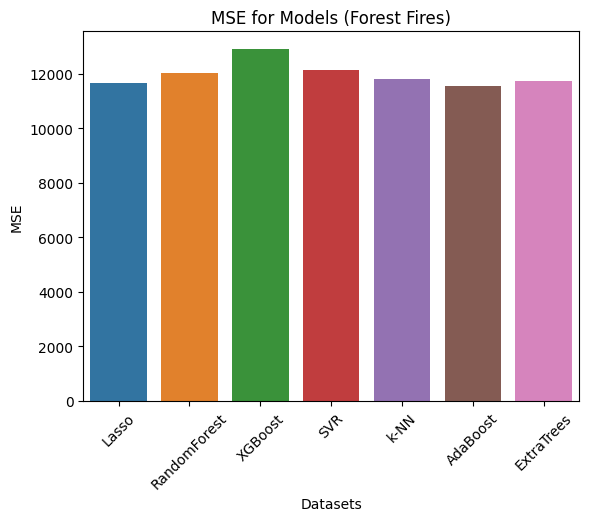

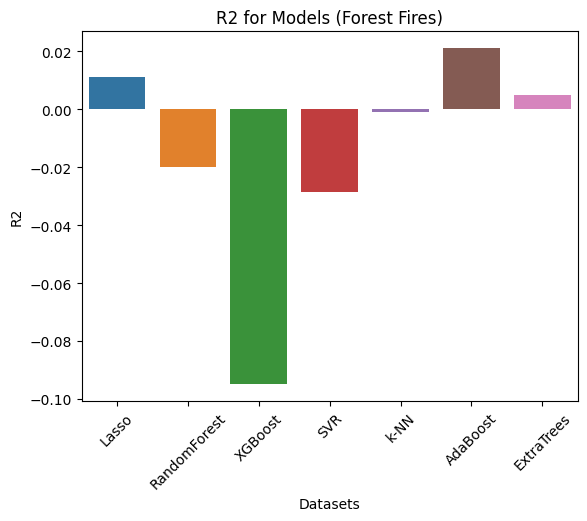

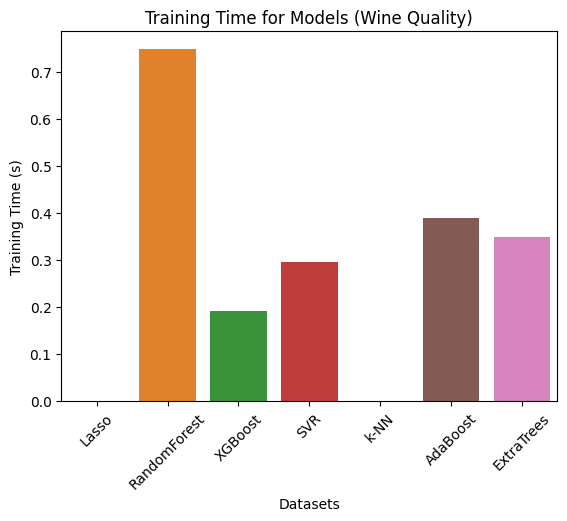

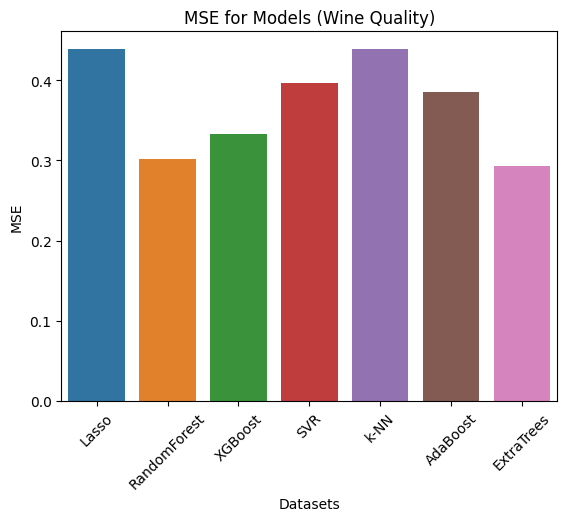

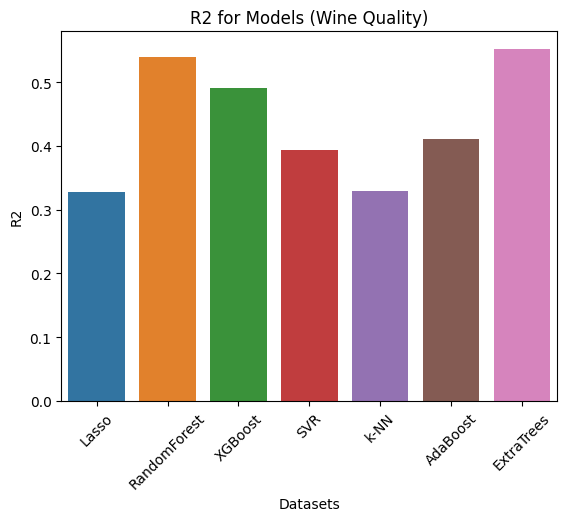

In [25]:
def plot_training_time(datasets, dataset_name):
    dataset_names = list(datasets.keys())
    model_names = list(datasets[dataset_names[0]].keys())

    training_times = []
    for name in dataset_names:
        if name == dataset_name:
            training_times.append([datasets[name][model_name]['elapsed_time'] for model_name in model_names])

    df = pd.DataFrame(training_times, columns=model_names, index=[dataset_name])
    sns.barplot(data=df, errorbar=None)
    plt.xlabel('Datasets')
    plt.ylabel('Training Time (s)')
    plt.title(f'Training Time for Models ({dataset_name})')
    plt.xticks(rotation=45)
    plt.show()

def plot_mse(datasets, dataset_name):
    dataset_names = list(datasets.keys())
    model_names = list(datasets[dataset_names[0]].keys())

    mse_values = []
    for name in dataset_names:
        if name == dataset_name:
            mse_values.append([datasets[name][model_name]['test_mse'] for model_name in model_names])

    df = pd.DataFrame(mse_values, columns=model_names, index=[dataset_name])
    sns.barplot(data=df, errorbar=None)
    plt.xlabel('Datasets')
    plt.ylabel('MSE')
    plt.title(f'MSE for Models ({dataset_name})')
    plt.xticks(rotation=45)
    plt.show()

def plot_mape(datasets, dataset_name):
    dataset_names = list(datasets.keys())
    model_names = list(datasets[dataset_names[0]].keys())

    mape_values = []
    for name in dataset_names:
        if name == dataset_name:
            mape_values.append([datasets[name][model_name]['test_r2'] for model_name in model_names])

    df = pd.DataFrame(mape_values, columns=model_names, index=[dataset_name])
    sns.barplot(data=df, errorbar=None)
    plt.xlabel('Datasets')
    plt.ylabel('R2')
    plt.title(f'R2 for Models ({dataset_name})')
    plt.xticks(rotation=45)
    plt.show()

def plot_all_models(datasets, dataset_name, task='regression'):
    plot_training_time(datasets, dataset_name)

    if task == 'regression':
        plot_mse(datasets, dataset_name)
        plot_mape(datasets, dataset_name)
    elif task == 'classification':
        plot_accuracy(datasets, dataset_name)

dataset_names = [
    'Parkinsons',
    'Energy Efficiency',
    'Superconductivity',
    'Forest Fires',
    'Wine Quality'
]

for dataset_name in dataset_names:
    plot_all_models(all_results, dataset_name, task='regression')


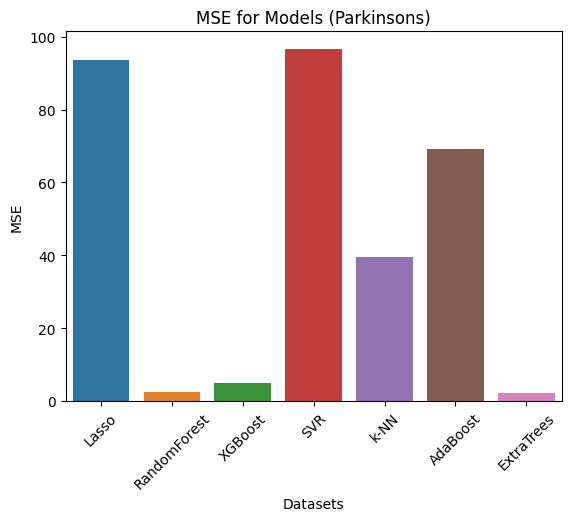

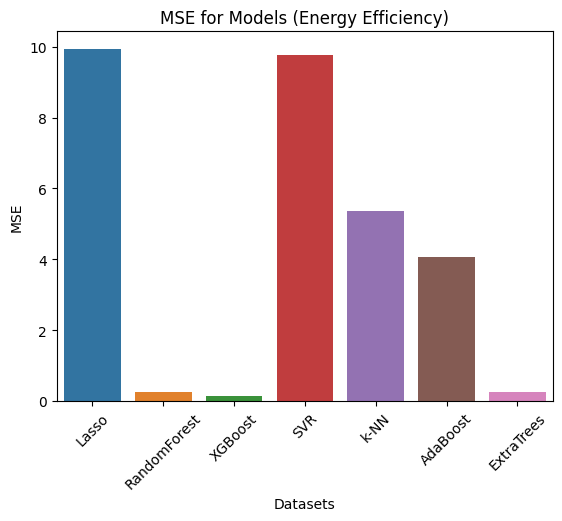

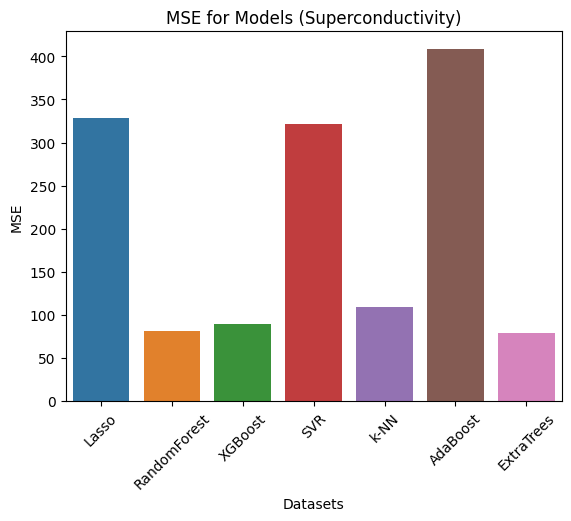

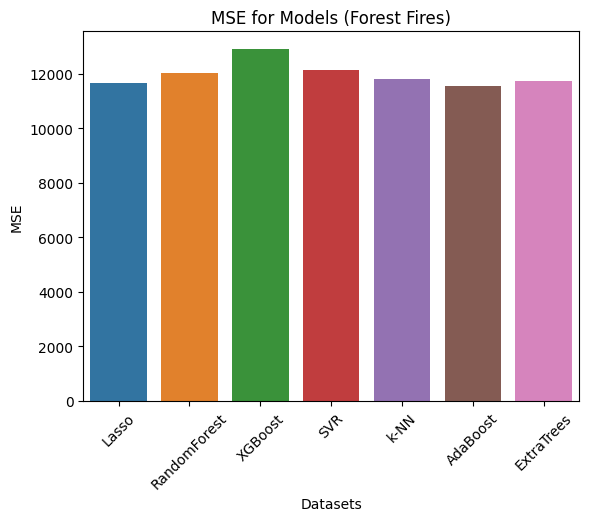

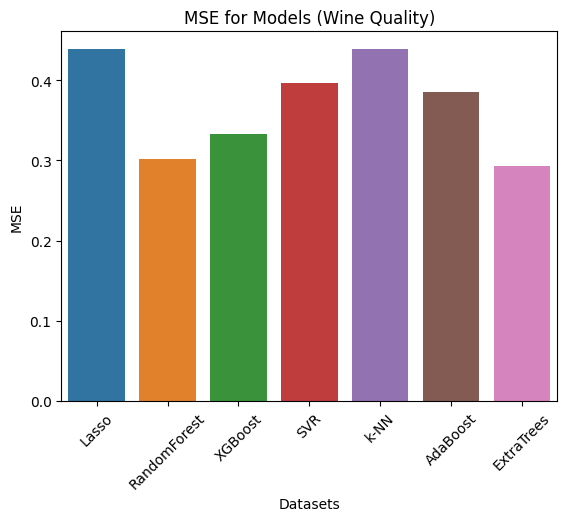

In [36]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

def plot_training_time_and_mape(datasets, dataset_name):
    dataset_names = list(datasets.keys())
    model_names = list(datasets[dataset_names[0]].keys())

    training_times = []
    mape_values = []

    for name in dataset_names:
        if name == dataset_name:
            training_times.append([datasets[name][model_name]['elapsed_time'] for model_name in model_names])
            mape_values.append([datasets[name][model_name]['test_r2'] for model_name in model_names])

    fig = make_subplots(rows=1, cols=2, subplot_titles=(f"Training Time ({dataset_name})", f"R2 ({dataset_name})"))

    for i, model_name in enumerate(model_names):
        fig.add_trace(go.Bar(x=[dataset_name], y=[training_times[0][i]], name=model_name), row=1, col=1)
        fig.add_trace(go.Bar(x=[dataset_name], y=[mape_values[0][i]], name=model_name), row=1, col=2)

    fig.update_xaxes(title_text="Datasets", row=1, col=1)
    fig.update_xaxes(title_text="Datasets", row=1, col=2)
    fig.update_yaxes(title_text="Training Time (s)", row=1, col=1)
    fig.update_yaxes(title_text="R2", row=1, col=2)

    fig.update_layout(title=f"{dataset_name} - Training Time and R2", showlegend=True, barmode='group')
    fig.show()

def plot_all_models(datasets, dataset_name, task='regression'):
    plot_training_time_and_mape(datasets, dataset_name)

    if task == 'regression':
        plot_mse(datasets, dataset_name)
    elif task == 'classification':
        plot_accuracy(datasets, dataset_name)

dataset_names = [
    'Parkinsons',
    'Energy Efficiency',
    'Superconductivity',
    'Forest Fires',
    'Wine Quality'
]

for dataset_name in dataset_names:
    plot_all_models(all_results, dataset_name, task='regression')


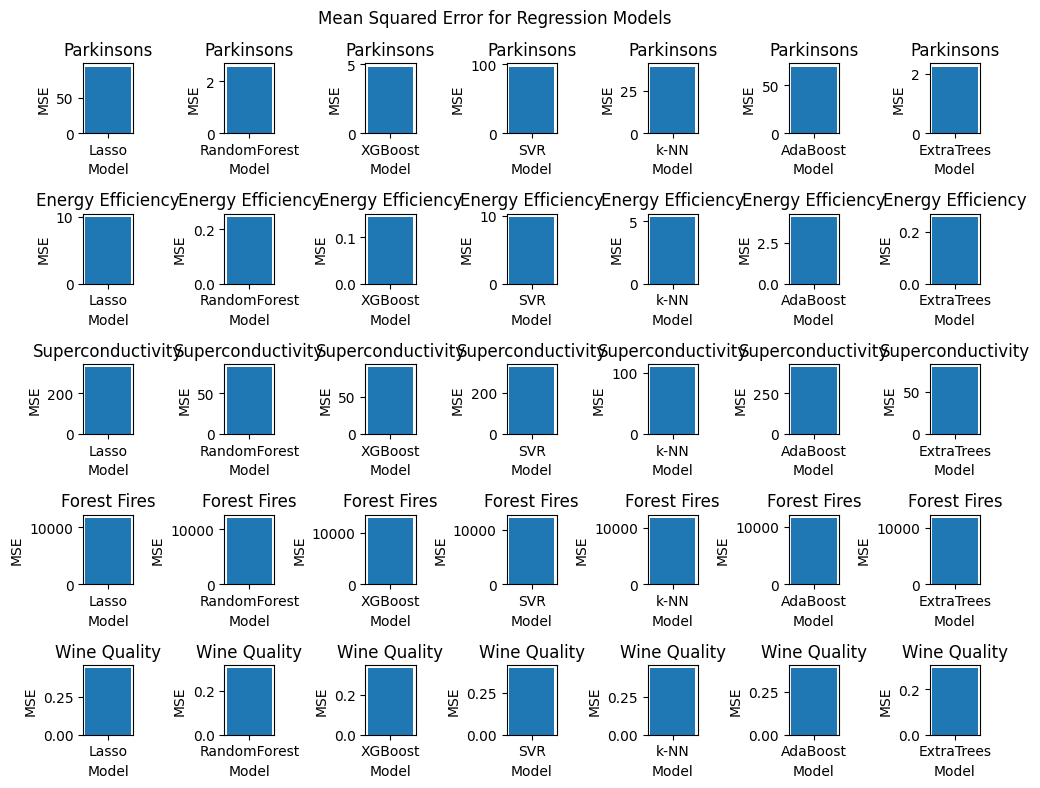

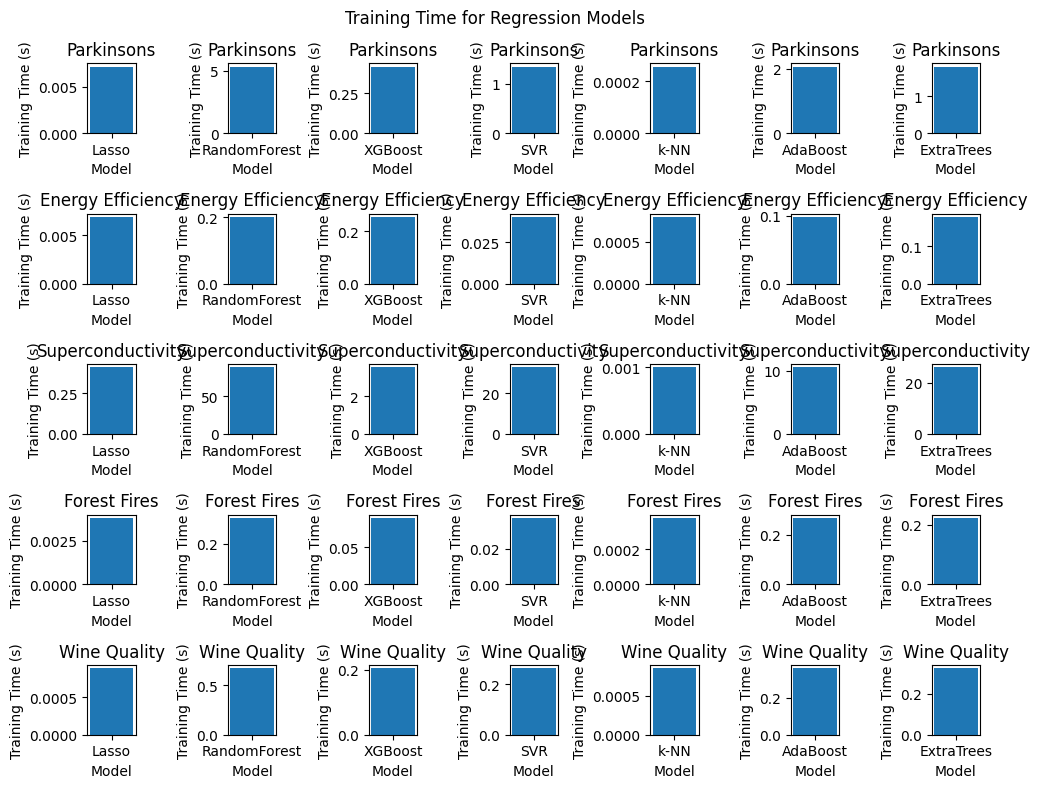

In [23]:
plot_mse(all_results, 'Mean Squared Error for Regression Models')
plot_training_time(all_results, 'Training Time for Regression Models')

In [30]:
def run_classifiers(X, y, output=None, random_state=42, test_size=0.2, epochs=50, batch_size=16, learning_rate=0.001):
    if output == None:
        output = len(np.unique(y))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    classifiers = [
        ('k-NN', KNeighborsClassifier(n_neighbors=3)),
        ('ExtraTrees', ExtraTreesClassifier(n_estimators=100, random_state=random_state)),
    ]

    nn_setup = {
        'epochs': epochs,
        'batch_size': batch_size,
        'learning_rate': learning_rate
    }

    results = {}
    for name, classifier in classifiers:
        start_time = time.time()
        classifier.fit(X_train, y_train)
        elapsed_time = time.time() - start_time
        y_pred_test = classifier.predict(X_test)
        mse = mean_squared_error(y_test, y_pred_test)
        accuracy = accuracy_score(y_test, y_pred_test)

        results[name] = {
            'test_mse': mse,
            'accuracy': accuracy,
            'elapsed_time': elapsed_time
        }

    # Neural Networks
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(output, activation='softmax'))

    optimizer = Adam(learning_rate=nn_setup['learning_rate'])
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    y_train_categorical = to_categorical(y_train)
    y_test_categorical = to_categorical(y_test)
    start_time = time.time()
    model.fit(X_train, y_train_categorical, epochs=nn_setup['epochs'], batch_size=nn_setup['batch_size'], verbose=0)
    elapsed_time_neural_network = time.time() - start_time

    y_pred_test_neural_network = np.argmax(model.predict(X_test), axis=1)
    mse_neural_network = mean_squared_error(y_test, y_pred_test_neural_network)
    accuracy_neural_network = accuracy_score(y_test, y_pred_test_neural_network)

    results['neural_network'] = {
        'test_mse': mse_neural_network,
        'accuracy': accuracy_neural_network,
        'elapsed_time': elapsed_time_neural_network
    }
    
    return results

In [31]:
def load_wine_quality():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
    data = requests.get(url).text
    df = pd.read_csv(StringIO(data), sep=';')
    X = df.drop('quality', axis=1).values
    y = df['quality'].values
    return X, y


def load_energy_efficiency():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
    df = pd.read_excel(url)
    X = df.drop(['Y1', 'Y2'], axis=1).values
    # Y1 Heating Load
    y = df['Y1'].values
    return X, y


def load_spam():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
    data = requests.get(url).text
    df = pd.read_csv(StringIO(data), header=None)
    X = df.drop(57, axis=1).values
    y = df[57].values
    return X, y


def load_heart_disease():
    # Cleveland Dataset
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
    df = pd.read_csv(url, header=None, na_values='?')
    df = df.dropna()
    X = df.drop(13, axis=1).values
    y = df[13].values
    return X, y

def load_handwritten_digits():
    digits = load_digits()
    df = pd.DataFrame(digits.data, columns=digits.feature_names)
    df['target'] = digits.target

    X = df.drop('target', axis=1).values
    y = df['target'].values
    return X, y




# Load datasets
X_wine, y_wine = load_wine_quality()
X_energy, y_energy = load_energy_efficiency()
X_spam, y_spam = load_spam()
X_heart, y_heart = load_heart_disease()
X_digits, y_digits = load_handwritten_digits()

# Scale datasets
scaler = MinMaxScaler()
X_wine_scaled = scaler.fit_transform(X_wine)
X_energy_scaled = scaler.fit_transform(X_energy)
X_spam_scaled = scaler.fit_transform(X_spam)
X_heart_scaled = scaler.fit_transform(X_heart)
X_digits_scaled = scaler.fit_transform(X_digits)

In [32]:
results_wine = run_classifiers(X_wine_scaled, y_wine, output = 9)
results_spam = run_classifiers(X_spam_scaled, y_spam)
results_heart = run_classifiers(X_heart_scaled, y_heart)
results_digits = run_classifiers(X_digits_scaled, y_digits)

2023-04-28 11:22:54.130096: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


12/12 [==============================] - 0s 2ms/step


In [33]:
datasets = {
    'Wine Quality': results_wine,
    'Spam': results_spam,
    'Heart Disease': results_heart,
    'Handwritten Digits': results_digits
}

models = ['k-NN', 'neural_network', 'ExtraTrees']

for dataset_name, dataset_results in datasets.items():
    print(dataset_name)
    for model_name in models:
        model_results = dataset_results[model_name]
        print(f"{model_name.capitalize()}: MSE: {model_results['test_mse']:.4f}, Accuracy: {model_results['accuracy']:.4f}")
    print()

Wine Quality
K-nn: MSE: 0.6500, Accuracy: 0.5344
Neural_network: MSE: 0.5062, Accuracy: 0.5687
Extratrees: MSE: 0.3500, Accuracy: 0.6875

Spam
K-nn: MSE: 0.1194, Accuracy: 0.8806
Neural_network: MSE: 0.0478, Accuracy: 0.9522
Extratrees: MSE: 0.0413, Accuracy: 0.9587

Heart Disease
K-nn: MSE: 1.3167, Accuracy: 0.6667
Neural_network: MSE: 1.1000, Accuracy: 0.6167
Extratrees: MSE: 1.4333, Accuracy: 0.6500

Handwritten Digits
K-nn: MSE: 0.3639, Accuracy: 0.9833
Neural_network: MSE: 0.2889, Accuracy: 0.9722
Extratrees: MSE: 0.2194, Accuracy: 0.9806



In [38]:
results_wine

{'k-NN': {'test_mse': 0.65,
  'accuracy': 0.534375,
  'elapsed_time': 0.0019791126251220703},
 'ExtraTrees': {'test_mse': 0.35,
  'accuracy': 0.6875,
  'elapsed_time': 0.2407379150390625},
 'neural_network': {'test_mse': 0.50625,
  'accuracy': 0.56875,
  'elapsed_time': 6.004742860794067}}

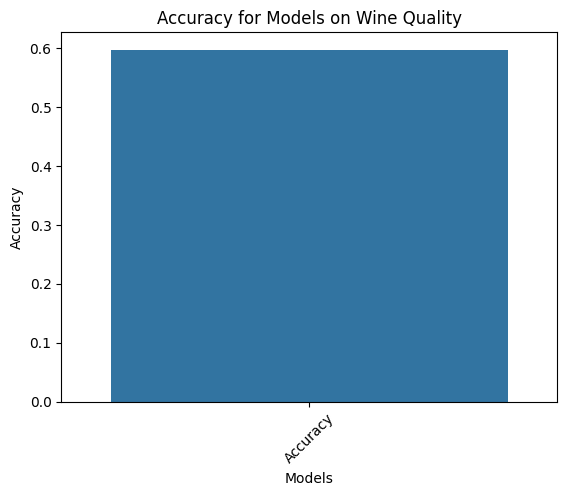

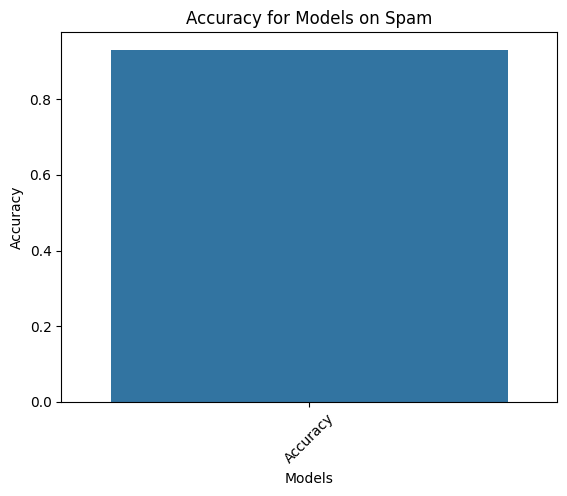

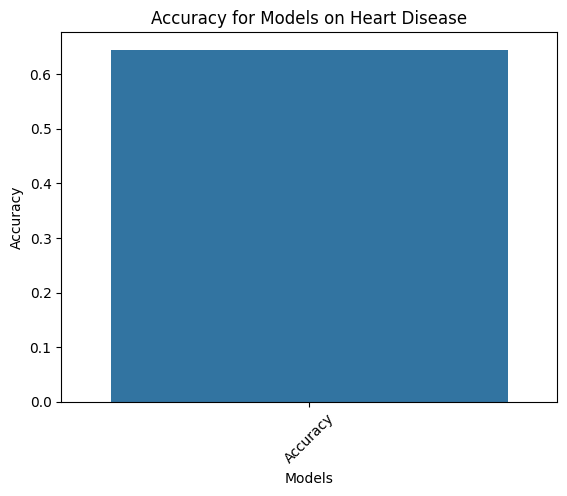

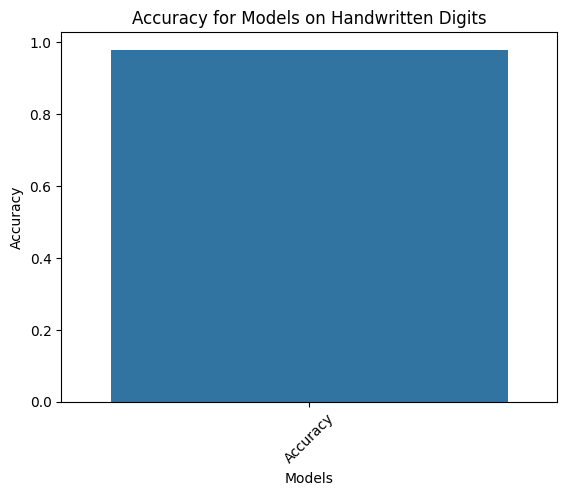

In [37]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

def plot_training_time_and_accuracy(datasets, dataset_name):
    dataset_names = list(datasets.keys())
    model_names = list(datasets[dataset_names[0]].keys())

    training_times = []
    accuracy_values = []

    for name in dataset_names:
        if name == dataset_name:
            training_times.append([datasets[name][model_name]['elapsed_time'] for model_name in model_names])
            accuracy_values.append([datasets[name][model_name]['accuracy'] for model_name in model_names])

    fig = make_subplots(rows=1, cols=2, subplot_titles=(f"Training Time ({dataset_name})", f"Accuracy ({dataset_name})"))

    for i, model_name in enumerate(model_names):
        fig.add_trace(go.Bar(x=[dataset_name], y=[training_times[0][i]], name=model_name), row=1, col=1)
        fig.add_trace(go.Bar(x=[dataset_name], y=[accuracy_values[0][i]], name=model_name), row=1, col=2)

    fig.update_xaxes(title_text="Datasets", row=1, col=1)
    fig.update_xaxes(title_text="Datasets", row=1, col=2)
    fig.update_yaxes(title_text="Training Time (s)", row=1, col=1)
    fig.update_yaxes(title_text="Accuracy", row=1, col=2)

    fig.update_layout(title=f"{dataset_name} - Training Time and Accuracy", showlegend=True, barmode='group')
    fig.show()

def plot_all_models(datasets, dataset_name, task='regression'):
    plot_training_time_and_accuracy(datasets, dataset_name)

    if task == 'regression':
        plot_mse(datasets, dataset_name)
    elif task == 'classification':
        plot_accuracy(datasets, dataset_name)

dataset_names = [
    'Wine Quality',
    'Spam',
    'Heart Disease',
    'Handwritten Digits'
]

for dataset_name in dataset_names:
    plot_all_models(datasets, dataset_name, task='classification')

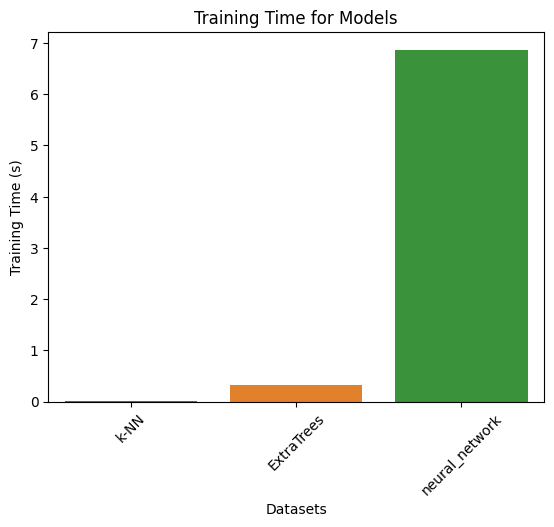

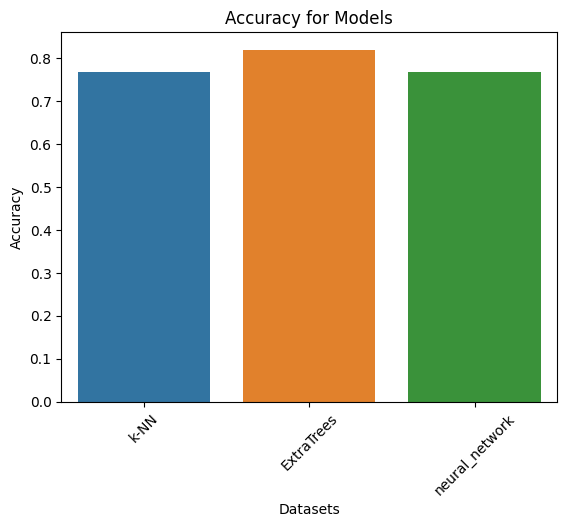

In [99]:
# plot_all_models(datasets, 'Classification')
plot_all_models(datasets, task='classification')

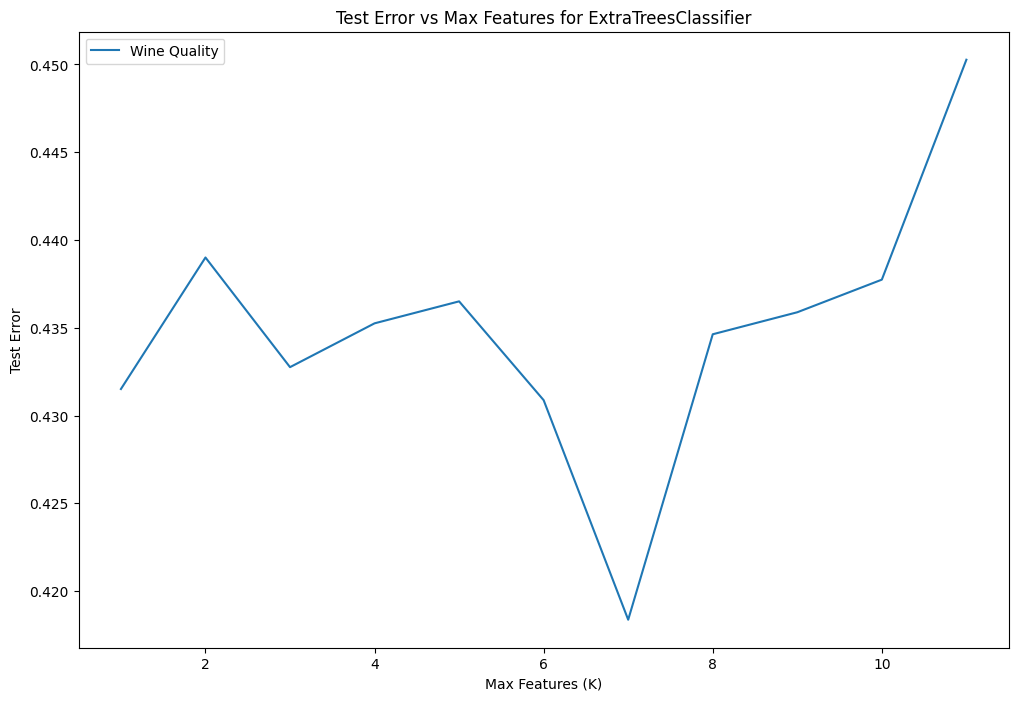

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
from sklearn.datasets import load_digits
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import requests

# Your dataset loading and scaling code goes here...

def test_error_vs_max_features(X, y):
    max_features_range = np.arange(1, X.shape[1] + 1)
    errors = []
    
    for max_features in max_features_range:
        clf = ExtraTreesClassifier(max_features=max_features, random_state=42, n_jobs=-1)
        scores = cross_val_score(clf, X, y, cv=5)
        errors.append(1 - np.mean(scores))
    
    return max_features_range, errors

# Create a figure
plt.figure(figsize=(12, 8))

# Plot test error vs max_features for each dataset

# results_wine = run_classifiers(X_wine_scaled, y_wine, output = 9)
# results_spam = run_classifiers(X_spam_scaled, y_spam)
# results_heart = run_classifiers(X_heart_scaled, y_heart)
# results_digits = run_classifiers(X_digits_scaled, y_digits)


max_features_range, errors = test_error_vs_max_features(X_wine_scaled, y_wine)
plt.plot(max_features_range, errors, label="Wine Quality")

plt.xlabel('Max Features (K)')
plt.ylabel('Test Error')
plt.legend()
plt.title('Test Error vs Max Features for ExtraTreesClassifier')
plt.show()


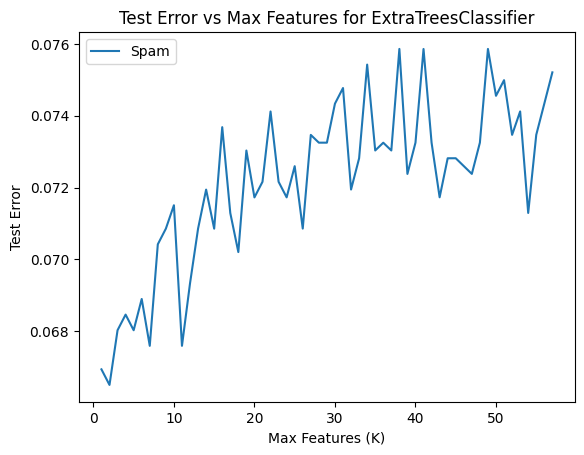

In [104]:
max_features_range, errors = test_error_vs_max_features(X_spam_scaled, y_spam)
plt.plot(max_features_range, errors, label="Spam")

plt.xlabel('Max Features (K)')
plt.ylabel('Test Error')
plt.legend()
plt.title('Test Error vs Max Features for ExtraTreesClassifier')
plt.show()

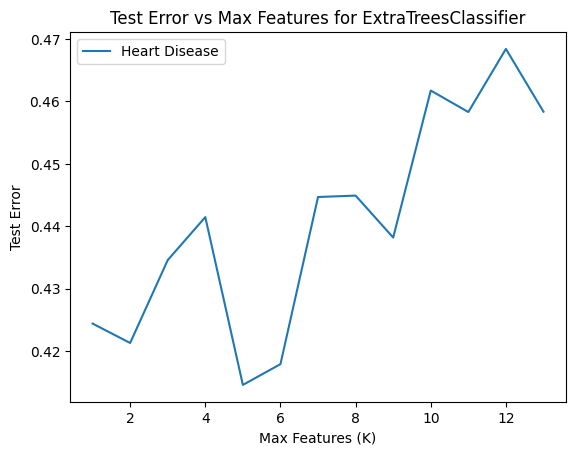

In [105]:
max_features_range, errors = test_error_vs_max_features(X_heart_scaled, y_heart)
plt.plot(max_features_range, errors, label="Heart Disease")

plt.xlabel('Max Features (K)')
plt.ylabel('Test Error')
plt.legend()
plt.title('Test Error vs Max Features for ExtraTreesClassifier')
plt.show()

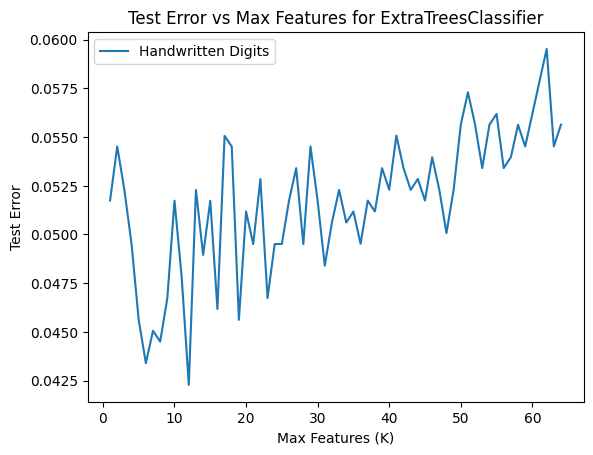

In [106]:
max_features_range, errors = test_error_vs_max_features(X_digits_scaled, y_digits)
plt.plot(max_features_range, errors, label="Handwritten Digits")

plt.xlabel('Max Features (K)')
plt.ylabel('Test Error')
plt.legend()
plt.title('Test Error vs Max Features for ExtraTreesClassifier')
plt.show()

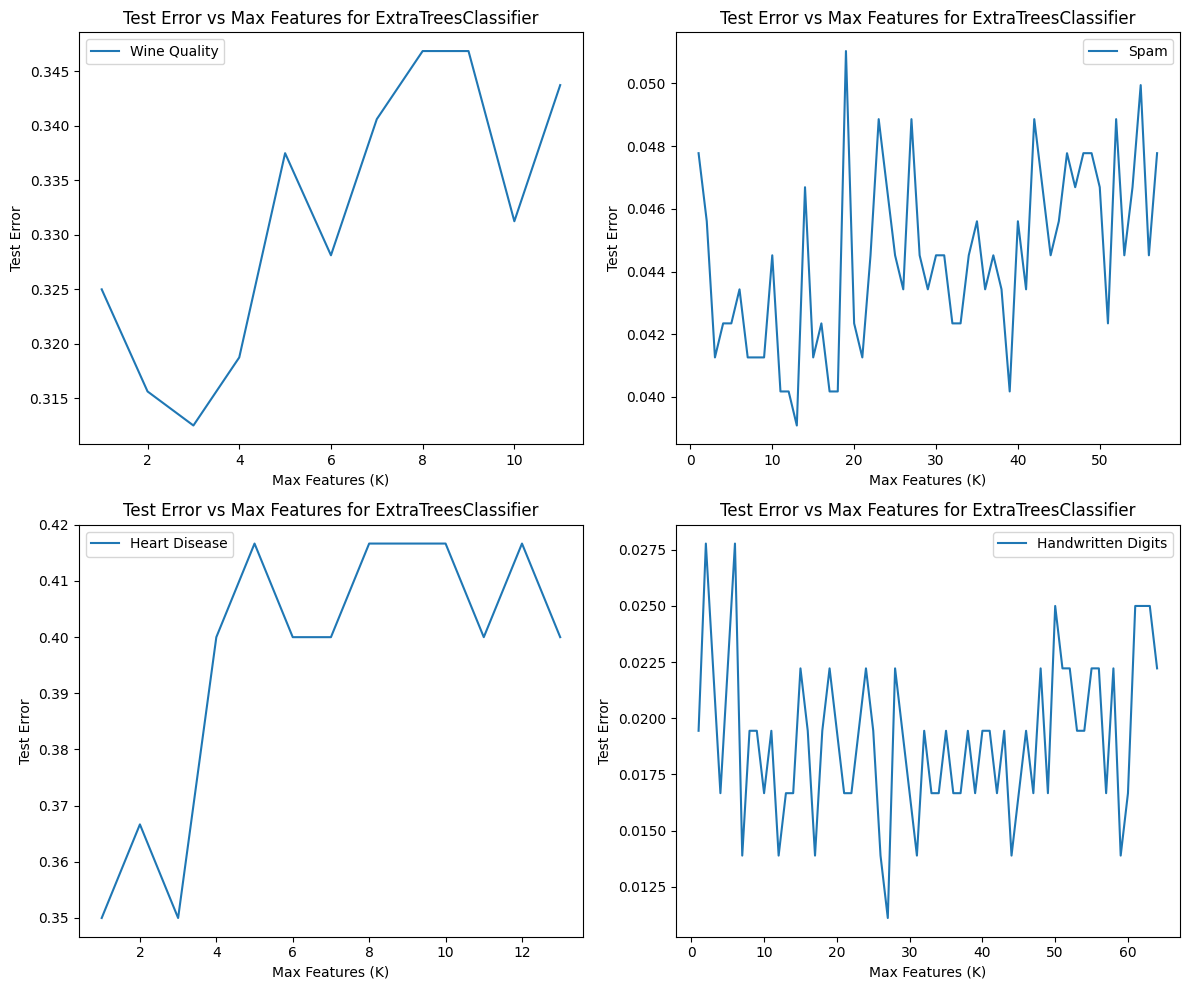

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to calculate test error
def test_error_vs_max_features(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    max_features_range = range(1, X.shape[1] + 1)
    errors = []

    for max_features in max_features_range:
        model = ExtraTreesClassifier(max_features=max_features, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        error = 1 - accuracy_score(y_test, y_pred)
        errors.append(error)

    return max_features_range, errors

# Function to plot test error vs max features for each dataset using subplots
def plot_test_error_vs_max_features(datasets):
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))
    ax = ax.ravel()

    for i, (name, data) in enumerate(datasets.items()):
        X, y = data
        max_features_range, errors = test_error_vs_max_features(X, y)
        
        ax[i].plot(max_features_range, errors, label=name)
        ax[i].set_xlabel('Max Features (K)')
        ax[i].set_ylabel('Test Error')
        ax[i].legend()
        ax[i].set_title('Test Error vs Max Features for ExtraTreesClassifier')

    plt.tight_layout()
    plt.show()

datasets = {
    'Wine Quality': (X_wine_scaled, y_wine),
    'Spam': (X_spam_scaled, y_spam),
    'Heart Disease': (X_heart_scaled, y_heart),
    'Handwritten Digits': (X_digits_scaled, y_digits)
}

plot_test_error_vs_max_features(datasets)

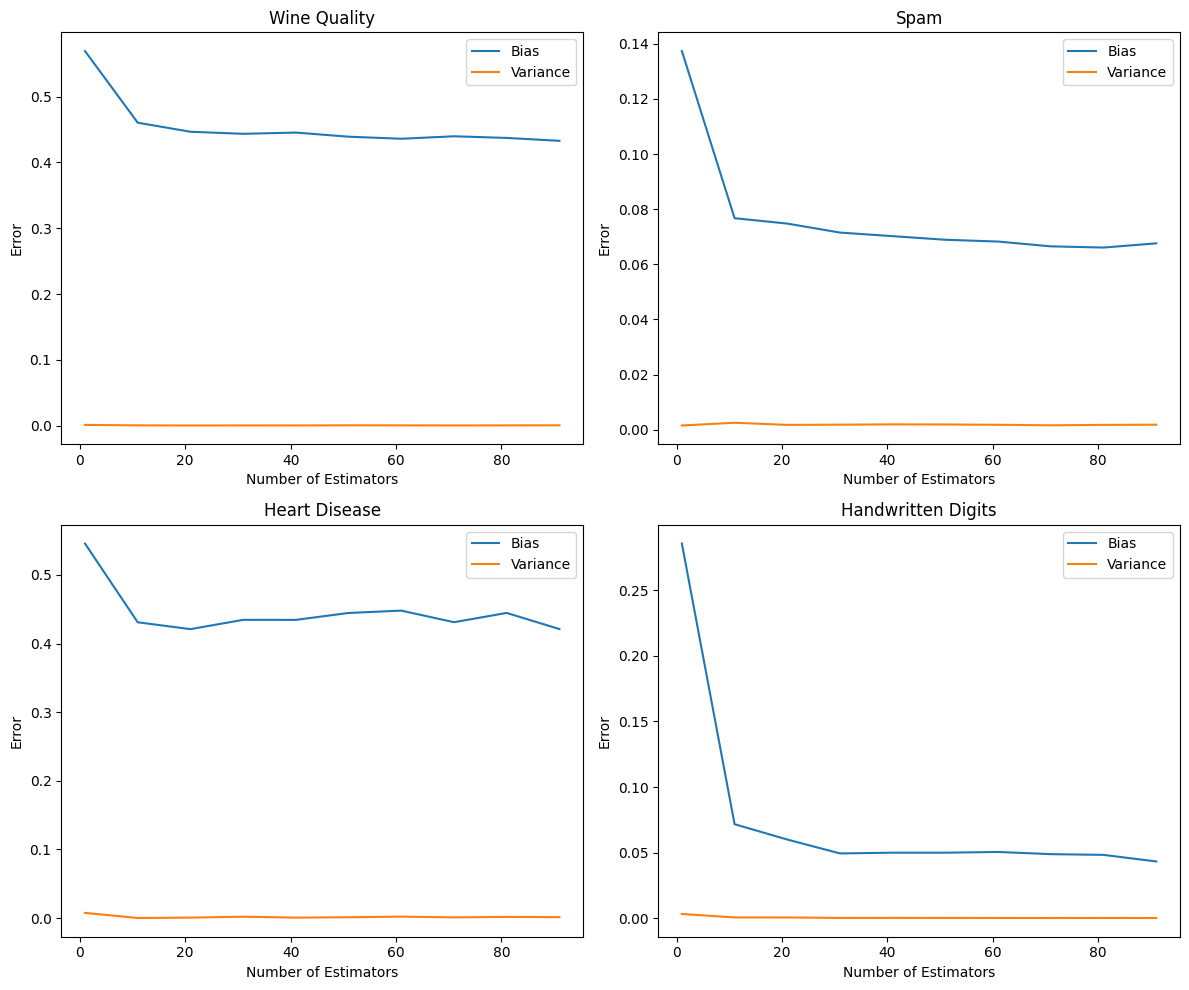

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

# Function to calculate bias and variance
def bias_variance_tradeoff(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    bias = 1 - np.mean(scores)
    variance = np.var(scores)
    return bias, variance

datasets = {
    'Wine Quality': (X_wine_scaled, y_wine),
    'Spam': (X_spam_scaled, y_spam),
    'Heart Disease': (X_heart_scaled, y_heart),
    'Handwritten Digits': (X_digits_scaled, y_digits)
}

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax = ax.ravel()

# Loop through datasets and plot the results
for i, (name, data) in enumerate(datasets.items()):
    X, y = data
    biases = []
    variances = []
    n_estimators_range = range(1, 101, 10)

    for n_estimators in n_estimators_range:
        model = ExtraTreesClassifier(n_estimators=n_estimators, random_state=42)
        bias, variance = bias_variance_tradeoff(model, X, y)
        biases.append(bias)
        variances.append(variance)

    ax[i].plot(n_estimators_range, biases, label='Bias')
    ax[i].plot(n_estimators_range, variances, label='Variance')
    ax[i].set_title(name)
    ax[i].set_xlabel('Number of Estimators')
    ax[i].set_ylabel('Error')
    ax[i].legend()

plt.tight_layout()
plt.show()

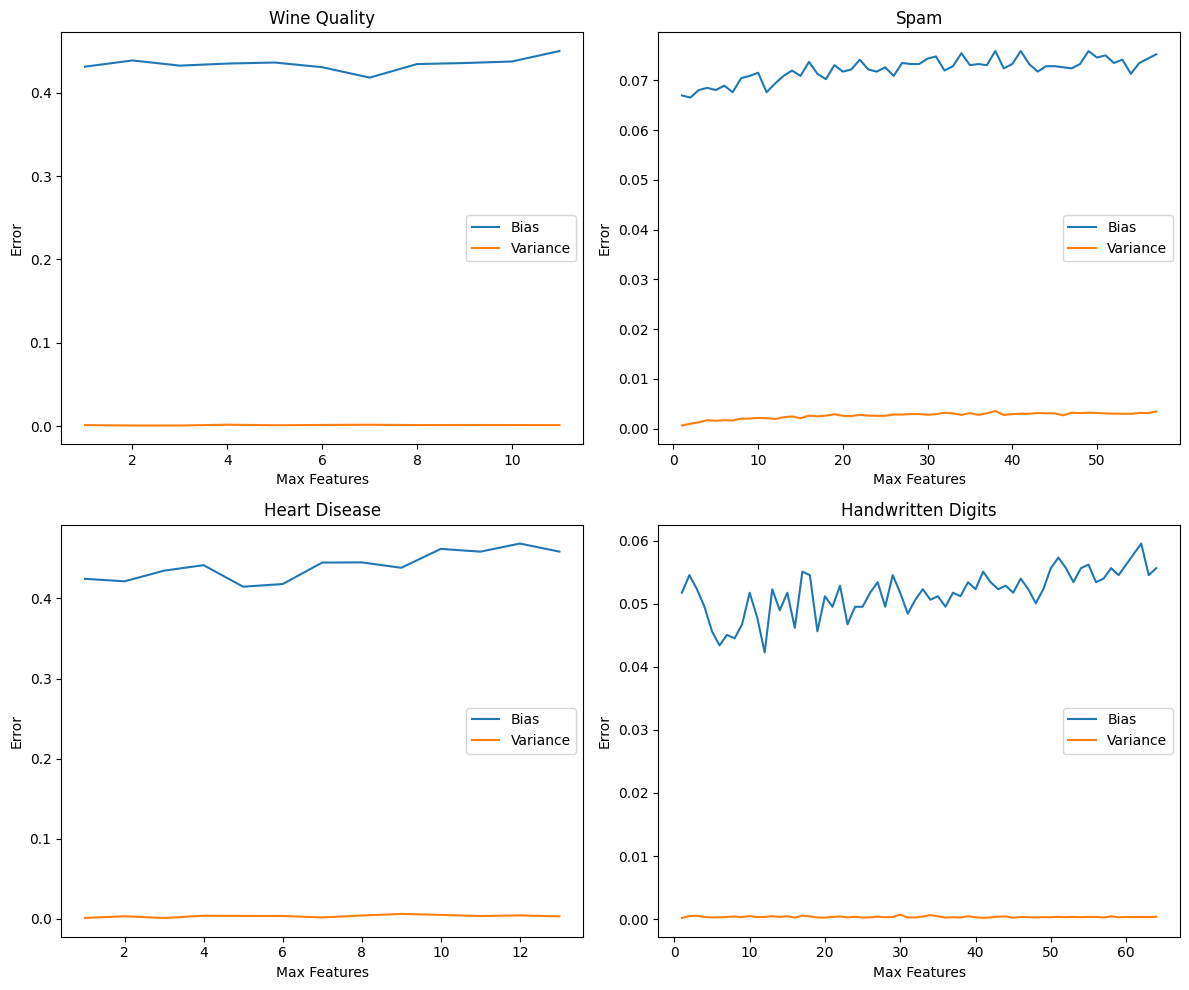

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

# Function to calculate bias and variance
def bias_variance_tradeoff(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    bias = 1 - np.mean(scores)
    variance = np.var(scores)
    return bias, variance

datasets = {
    'Wine Quality': (X_wine_scaled, y_wine),
    'Spam': (X_spam_scaled, y_spam),
    'Heart Disease': (X_heart_scaled, y_heart),
    'Handwritten Digits': (X_digits_scaled, y_digits)
}

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax = ax.ravel()

# Loop through datasets and plot the results
for i, (name, data) in enumerate(datasets.items()):
    X, y = data
    biases = []
    variances = []
    max_features_range = range(1, X.shape[1] + 1)

    for max_features in max_features_range:
        model = ExtraTreesClassifier(n_estimators=100, max_features=max_features, random_state=42)
        bias, variance = bias_variance_tradeoff(model, X, y)
        biases.append(bias)
        variances.append(variance)

    ax[i].plot(max_features_range, biases, label='Bias')
    ax[i].plot(max_features_range, variances, label='Variance')
    ax[i].set_title(name)
    ax[i].set_xlabel('Max Features')
    ax[i].set_ylabel('Error')
    ax[i].legend()

plt.tight_layout()
plt.show()